In [100]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from random import randint
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Colocar los tags de mejor forma en el dataframe

In [101]:
all_tags_df = pd.read_csv(os.path.join('data', 'tags_anime_con.csv'))

In [102]:
# Convertir los posibles valores NaN de Tags a "" (caso hipótetico)

all_tags_df['Tags'] = all_tags_df['Tags'].fillna("")

Para obtener los tags, lo que se pensó fue primeramente obtener un conjunto con todos los tags
existentes. Luego, se colocaría un 1 en cada tag que tuviera el anime, y un 0 en los que no. Así,
se puede trabajar más eficientemente con los tags y dar cuenta de si un anime presenta un tag o no. 

In [103]:
# Obtener todos los tags únicos en el DataFrame

all_tags = set(
    tag.strip() if isinstance(tags_str, str) else tag
    for tags_str in all_tags_df["Tags"]
    for tag in (
        tags_str.strip("[]").split(",") if isinstance(tags_str, str) else tags_str
    )
)

# Eliminar el tag fantasma de all_tags, cuyo valor es ""; no sirve de nada la verdad.

all_tags.remove("")

# Además, quitar las ' de los tags, que no sirven de nada, y están al comienzo y al final de cada
# tag

all_tags = set(tag.strip("'") for tag in all_tags)

# Crear columnas para cada tag en el DataFrame
for tag in all_tags:
    all_tags_df[tag] = all_tags_df["Tags"].apply(lambda x: 1 if tag in x else 0)

In [104]:
# Por conveniencia, lo más útil es eliminar la columna "URL", junto a "Tags" y hacer "Anime" sea el
# index del DataFrame.

all_tags_df = all_tags_df.drop(columns=["URL", "Tags"]).set_index("Anime")

In [105]:
# Por temas de memoria, es conveniente hacer el dataframe sparse.

all_tags_df_sparse = all_tags_df.astype(pd.SparseDtype(np.int8, fill_value=0))

In [106]:
all_tags_df_sparse

,War,Emotional Abuse,Mature Themes,Orphans,Death of a Loved One,Shounen,Shoujo,Martial Arts,Demons,Curse,...,Swordplay,Based on a Manga,Military,Siblings,Animal Transformation,Dysfunctional Families,Animal Abuse,Zodiac,Mystery,Supernatural
Anime,,,,,,,,,,,,,,,,,,,,,
Attack on Titan The Final Season: The Final Chapters,1,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
Fullmetal Alchemist: Brotherhood,0,0,1,0,1,1,0,0,0,0,...,0,1,1,1,0,0,1,0,1,0
Fruits Basket the Final Season,0,1,1,1,0,0,1,0,0,1,...,0,1,0,0,1,1,0,1,0,0
Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,0,0,0,1,0,1,0,1,1,0,...,1,1,0,1,0,0,0,0,0,1
Jujutsu Kaisen 2nd Season,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Mad Capsule Markets: Pulse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kyoufu no Hiruyasumi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xing Xueyuan III: Pandora Mijing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Análisis exploratorio del dataframe de tags (sin gráficos)

In [107]:
# En primer lugar, notar que tenemos la siguiente cantidad de tags:

len(all_tags_df_sparse.columns)

35

In [110]:
# Para ver duplicados, usar el método duplicated(); luego las organizamos para que se vea mejor que
# los datos efecticamente están duplicados. Consideramos duplicados solamente si tienen el mismo
# índice, es decir, que son el mismo anime. Si no, no tiene sentido considerarlos duplicados.

duplicated_animes = all_tags_df_sparse[all_tags_df_sparse.index.duplicated(keep=False)].sort_index()

# Verificamos que efectivamente son duplicados

duplicated_animes

,War,Emotional Abuse,Mature Themes,Orphans,Death of a Loved One,Shounen,Shoujo,Martial Arts,Demons,Curse,...,Swordplay,Based on a Manga,Military,Siblings,Animal Transformation,Dysfunctional Families,Animal Abuse,Zodiac,Mystery,Supernatural
Anime,,,,,,,,,,,,,,,,,,,,,
group_inou: CATCH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_inou: CATCH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# Eliminar los duplicados, utilizando el método drop_duplicates(), inplace=True para que se haga el
# cambio. Consideramos para la deleción solamente los duplicados que tienen el mismo índice, es
# decir, que son el mismo anime. Si no, no tiene sentido considerarlos duplicados.

# Encuentra los índices de las filas duplicadas basándote en el índice (anime)
duplicated_indices = all_tags_df_sparse[all_tags_df_sparse.index.duplicated()].index

# Elimina las filas duplicadas utilizando los índices
all_tags_df_sparse.drop(index=duplicated_indices, inplace=True)

In [115]:
all_tags_df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23332 entries, Attack on Titan The Final Season: The Final Chapters to Shinmai Ossan Boukensha, Saikyou Party ni Shinu Hodo Kitaerarete Muteki ni Naru.
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype           
---  ------                  --------------  -----           
 0   War                     23332 non-null  Sparse[int32, 0]
 1   Emotional Abuse         23332 non-null  Sparse[int32, 0]
 2   Mature Themes           23332 non-null  Sparse[int32, 0]
 3   Orphans                 23332 non-null  Sparse[int32, 0]
 4   Death of a Loved One    23332 non-null  Sparse[int32, 0]
 5   Shounen                 23332 non-null  Sparse[int32, 0]
 6   Shoujo                  23332 non-null  Sparse[int32, 0]
 7   Martial Arts            23332 non-null  Sparse[int32, 0]
 8   Demons                  23332 non-null  Sparse[int32, 0]
 9   Curse                   23332 non-null  Sparse[int32, 0]
 10  Dark Fantasy         

Como ya se trabajó previamente, los tipos de datos son los pertinentes. Además, efectivamente el
nombre de cada columna del dataframe logra ser idóneo, pues se entiende que cada columna representa
el nombre de un tag existente en Anime-Planet. Debido al trabajo ya realizado en el dataframe, se
ve que es inútil comprobar la existencia de valores nulos. 

In [116]:
# Promedio de los tags

all_tags_df_sparse.mean().sort_values(ascending=False)

Violence                  0.000171
Based on a Manga          0.000171
Action                    0.000129
Mature Themes             0.000129
Drama                     0.000129
Fantasy                   0.000129
Shounen                   0.000129
Suicide                   0.000086
Adventure                 0.000086
Physical Abuse            0.000086
Explicit Violence         0.000086
Military                  0.000086
Siblings                  0.000086
Orphans                   0.000086
Domestic Abuse            0.000086
Animal Transformation     0.000043
Dysfunctional Families    0.000043
Animal Abuse              0.000043
Zodiac                    0.000043
Swordplay                 0.000043
Mystery                   0.000043
Mental Illness            0.000043
War                       0.000043
Romance                   0.000043
Conspiracy                0.000043
Emotional Abuse           0.000043
Contemporary Fantasy      0.000043
Historical                0.000043
Dark Fantasy        

In [117]:
# ¿Cuál es el tag menos común? ¿Cuántos animes tienen ese tag?

all_tags_df_sparse.sum().sort_values(ascending=True)

War                       1
Zodiac                    1
Animal Abuse              1
Dysfunctional Families    1
Animal Transformation     1
Swordplay                 1
Mental Illness            1
Romance                   1
Conspiracy                1
Mystery                   1
Contemporary Fantasy      1
Supernatural              1
Shoujo                    1
Dark Fantasy              1
Emotional Abuse           1
Death of a Loved One      1
Curse                     1
Demons                    1
Martial Arts              1
Historical                1
Orphans                   2
Siblings                  2
Military                  2
Explicit Violence         2
Domestic Abuse            2
Suicide                   2
Adventure                 2
Physical Abuse            2
Fantasy                   3
Shounen                   3
Drama                     3
Mature Themes             3
Action                    3
Based on a Manga          4
Violence                  4
dtype: int32

In [129]:
print(f"El tag menos común es {all_tags_df_sparse.sum().sort_values(ascending=True).index[0]}")

# ¿Existen más tags que aparecen dicha cantidad de veces exactamente?

print(f"Existen {len(all_tags_df_sparse.sum().sort_values(ascending=True)[all_tags_df_sparse.sum().sort_values(ascending=True) == 1])} tags que aparecen {all_tags_df_sparse.sum().sort_values(ascending=True)[0]} veces, específicamente, sus nombres son los siguientes:")

for tag in all_tags_df_sparse.sum().sort_values(ascending=True)[all_tags_df_sparse.sum().sort_values(ascending=True) == 1].index:
    print(f"\t{tag}")

El tag menos común es War
Existen 20 tags que aparecen 1 veces, específicamente, sus nombres son los siguientes:
	War
	Zodiac
	Animal Abuse
	Dysfunctional Families
	Animal Transformation
	Swordplay
	Mental Illness
	Romance
	Conspiracy
	Mystery
	Contemporary Fantasy
	Supernatural
	Shoujo
	Dark Fantasy
	Emotional Abuse
	Death of a Loved One
	Curse
	Demons
	Martial Arts
	Historical


In [130]:
# ¿Cuál es el tag más común? ¿Cuántos animes tienen ese tag?

all_tags_df_sparse.sum().sort_values(ascending=False)

Violence                  4
Based on a Manga          4
Action                    3
Mature Themes             3
Drama                     3
Fantasy                   3
Shounen                   3
Suicide                   2
Adventure                 2
Physical Abuse            2
Explicit Violence         2
Military                  2
Siblings                  2
Orphans                   2
Domestic Abuse            2
Animal Transformation     1
Dysfunctional Families    1
Animal Abuse              1
Zodiac                    1
Swordplay                 1
Mystery                   1
Mental Illness            1
War                       1
Romance                   1
Conspiracy                1
Emotional Abuse           1
Contemporary Fantasy      1
Historical                1
Dark Fantasy              1
Curse                     1
Demons                    1
Martial Arts              1
Shoujo                    1
Death of a Loved One      1
Supernatural              1
dtype: int32

In [137]:
print(
    f"El tag más común es {all_tags_df_sparse.sum().sort_values(ascending=False).index[0]}"
)

# Obtén el número de veces que aparece el tag más común
max_tag_count = all_tags_df_sparse.sum().max()

# ¿Existen más tags que solo aparecen la misma cantidad de veces que el tag más común?
count_same_as_max = (all_tags_df_sparse.sum() == max_tag_count).sum()
print(
    f"Existen {count_same_as_max} tags que aparecen {max_tag_count} veces. Sus nombres son los siguientes:"
)

# Imprime los nombres de los tags que aparecen la misma cantidad de veces que el tag más común
for tag in all_tags_df_sparse.columns[all_tags_df_sparse.sum() == max_tag_count]:
    print(f"\t{tag}")

El tag más común es Violence
Existen 2 tags que aparecen 4 veces. Sus nombres son los siguientes:
	Violence
	Based on a Manga


In [138]:
# ¿Cuál es el anime con más tags de todos? ¿Cuántos tags tiene?

all_tags_df_sparse.sum(axis=1).sort_values(ascending=False)

Anime
Fruits Basket the Final Season                                                      18
Fullmetal Alchemist: Brotherhood                                                    15
Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc                         13
Attack on Titan The Final Season: The Final Chapters                                13
Xiyou Xin Chuan                                                                      0
                                                                                    ..
Nissin no Donbei x That Time I Got Reincarnated as a Slime CMs                       0
Spookiz                                                                              0
Invaders of the Rokujyoma!? PV                                                       0
Kaiketsu Zorori                                                                      0
Shinmai Ossan Boukensha, Saikyou Party ni Shinu Hodo Kitaerarete Muteki ni Naru.     0
Length: 23332, dtype: int32

In [141]:
print(f"El anime con más tags es {all_tags_df_sparse.sum(axis=1).sort_values(ascending=False).index[0]}, con {all_tags_df_sparse.sum(axis=1).sort_values(ascending=False)[0]} tags.")

# ¿Existen más animes que tienen la misma cantidad de tags que el anime con más tags?

print(f"Existen {len(all_tags_df_sparse.sum(axis=1)[all_tags_df_sparse.sum(axis=1) == all_tags_df_sparse.sum(axis=1).max()])} animes que tienen {all_tags_df_sparse.sum(axis=1).max()} tags. Sus nombres son los siguientes:")
for anime in all_tags_df_sparse.index[all_tags_df_sparse.sum(axis=1) == all_tags_df_sparse.sum(axis=1).max()]:
    print(f"\t{anime}")

El anime con más tags es Fruits Basket the Final Season, con 18 tags.
Existen 1 animes que tienen 18 tags. Sus nombres son los siguientes:
	Fruits Basket the Final Season


In [142]:
# ¿Cuál es el anime con menos tags de todos? ¿Cuántos tags tiene?

all_tags_df_sparse.sum(axis=1).sort_values(ascending=True)

Anime
Ghost (1984)                                                    0
Box                                                             0
Cinderella Boy                                                  0
Hashi no Mukou                                                  0
Fushigi na Kusuri                                               0
                                                               ..
Miminari                                                        0
Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc    13
Attack on Titan The Final Season: The Final Chapters           13
Fullmetal Alchemist: Brotherhood                               15
Fruits Basket the Final Season                                 18
Length: 23332, dtype: int32

In [143]:
print(f"El anime con menos tags es {all_tags_df_sparse.sum(axis=1).sort_values(ascending=True).index[0]}, con {all_tags_df_sparse.sum(axis=1).sort_values(ascending=True)[0]} tags.")

# ¿Existen más animes que tienen la misma cantidad de tags que el anime con menos tags?

print(f"Existen {len(all_tags_df_sparse.sum(axis=1)[all_tags_df_sparse.sum(axis=1) == all_tags_df_sparse.sum(axis=1).min()])} animes que tienen {all_tags_df_sparse.sum(axis=1).min()} tags. Sus nombres son los siguientes:")
for anime in all_tags_df_sparse.index[all_tags_df_sparse.sum(axis=1) == all_tags_df_sparse.sum(axis=1).min()]:
    print(f"\t{anime}")

El anime con menos tags es Ghost (1984), con 0 tags.
Existen 23328 animes que tienen 0 tags. Sus nombres son los siguientes:
	Jujutsu Kaisen 2nd Season
	Mo Dao Zu Shi 3
	Attack on Titan 3rd Season: Part II
	Bleach: Thousand-Year Blood War
	Heaven Official's Blessing 2nd Season
	Haikyuu!! Karasuno High School vs Shiratorizawa Academy
	Jujutsu Kaisen
	Kaguya-sama: Love is War - Ultra Romantic
	Haikyuu!! Second Season
	your name.
	A Silent Voice
	Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train
	Hunter x Hunter (2011)
	Attack on Titan The Final Season
	The Apothecary Diaries
	Heaven Official's Blessing Special
	Haikyuu!! To the Top: Part II
	SPY x FAMILY
	Demon Slayer: Kimetsu no Yaiba
	Frieren: Beyond Journey's End
	Violet Evergarden Movie
	Code Geass: Lelouch of the Rebellion R2
	Link Click 2nd Season
	Mo Dao Zu Shi 2
	That Time I Got Reincarnated as a Slime Season 2
	Gintama: The Very Final
	Gintama': Enchousen
	Attack on Titan The Final Season: Part II
	Mob Psycho 100 II
	Gintama Ka

In [144]:
# ¿Cuál es el promedio de cantidad de tags por anime?

all_tags_df_sparse.sum(axis=1).mean()


0.0025287159266243787

In [145]:
# ¿Cuál es la mediana de cantidad de tags por anime?

all_tags_df_sparse.sum(axis=1).median()

0.0

In [146]:
# ¿Cuál es la moda de cantidad de tags por anime?

all_tags_df_sparse.sum(axis=1).mode()

0    0
dtype: int32

In [147]:
# ¿Cuál es la desviación estándar de cantidad de tags por anime?

all_tags_df_sparse.sum(axis=1).std()


0.19496587610329957

### Análisis exploratorio del dataframe de tags (con gráficos)

In [148]:
# ¿Cómo será la correlación entre los tags? ¿Será que hay tags que siempre aparecen juntos?

all_tags_df_sparse.corr()

,War,Emotional Abuse,Mature Themes,Orphans,Death of a Loved One,Shounen,Shoujo,Martial Arts,Demons,Curse,...,Swordplay,Based on a Manga,Military,Siblings,Animal Transformation,Dysfunctional Families,Animal Abuse,Zodiac,Mystery,Supernatural
War,1.000000,-0.000043,0.577326,-0.000061,-0.000043,0.577326,-0.000043,-0.000043,-0.000043,-0.000043,...,-0.000043,0.499968,0.707092,-0.000061,-0.000043,-0.000043,-0.000043,-0.000043,-0.000043,-0.000043
Emotional Abuse,-0.000043,1.000000,0.577326,0.707092,-0.000043,-0.000074,1.000000,-0.000043,-0.000043,1.000000,...,-0.000043,0.499968,-0.000061,-0.000061,1.000000,1.000000,-0.000043,1.000000,-0.000043,-0.000043
Mature Themes,0.577326,0.577326,1.000000,0.408187,0.577326,0.666624,0.577326,-0.000074,-0.000074,0.577326,...,-0.000074,0.866007,0.816479,0.408187,0.577326,0.577326,0.577326,0.577326,0.577326,-0.000074
Orphans,-0.000061,0.707092,0.408187,1.000000,-0.000061,0.408187,0.707092,0.707092,0.707092,0.707092,...,0.707092,0.707076,-0.000086,0.499957,0.707092,0.707092,-0.000061,0.707092,-0.000061,0.707092
Death of a Loved One,-0.000043,-0.000043,0.577326,-0.000061,1.000000,0.577326,-0.000043,-0.000043,-0.000043,-0.000043,...,-0.000043,0.499968,0.707092,0.707092,-0.000043,-0.000043,1.000000,-0.000043,1.000000,-0.000043
Shounen,0.577326,-0.000074,0.666624,0.408187,0.577326,1.000000,-0.000074,0.577326,0.577326,-0.000074,...,0.577326,0.866007,0.816479,0.816479,-0.000074,-0.000074,0.577326,-0.000074,0.577326,0.577326
Shoujo,-0.000043,1.000000,0.577326,0.707092,-0.000043,-0.000074,1.000000,-0.000043,-0.000043,1.000000,...,-0.000043,0.499968,-0.000061,-0.000061,1.000000,1.000000,-0.000043,1.000000,-0.000043,-0.000043
Martial Arts,-0.000043,-0.000043,-0.000074,0.707092,-0.000043,0.577326,-0.000043,1.000000,1.000000,-0.000043,...,1.000000,0.499968,-0.000061,0.707092,-0.000043,-0.000043,-0.000043,-0.000043,-0.000043,1.000000
Demons,-0.000043,-0.000043,-0.000074,0.707092,-0.000043,0.577326,-0.000043,1.000000,1.000000,-0.000043,...,1.000000,0.499968,-0.000061,0.707092,-0.000043,-0.000043,-0.000043,-0.000043,-0.000043,1.000000
Curse,-0.000043,1.000000,0.577326,0.707092,-0.000043,-0.000074,1.000000,-0.000043,-0.000043,1.000000,...,-0.000043,0.499968,-0.000061,-0.000061,1.000000,1.000000,-0.000043,1.000000,-0.000043,-0.000043


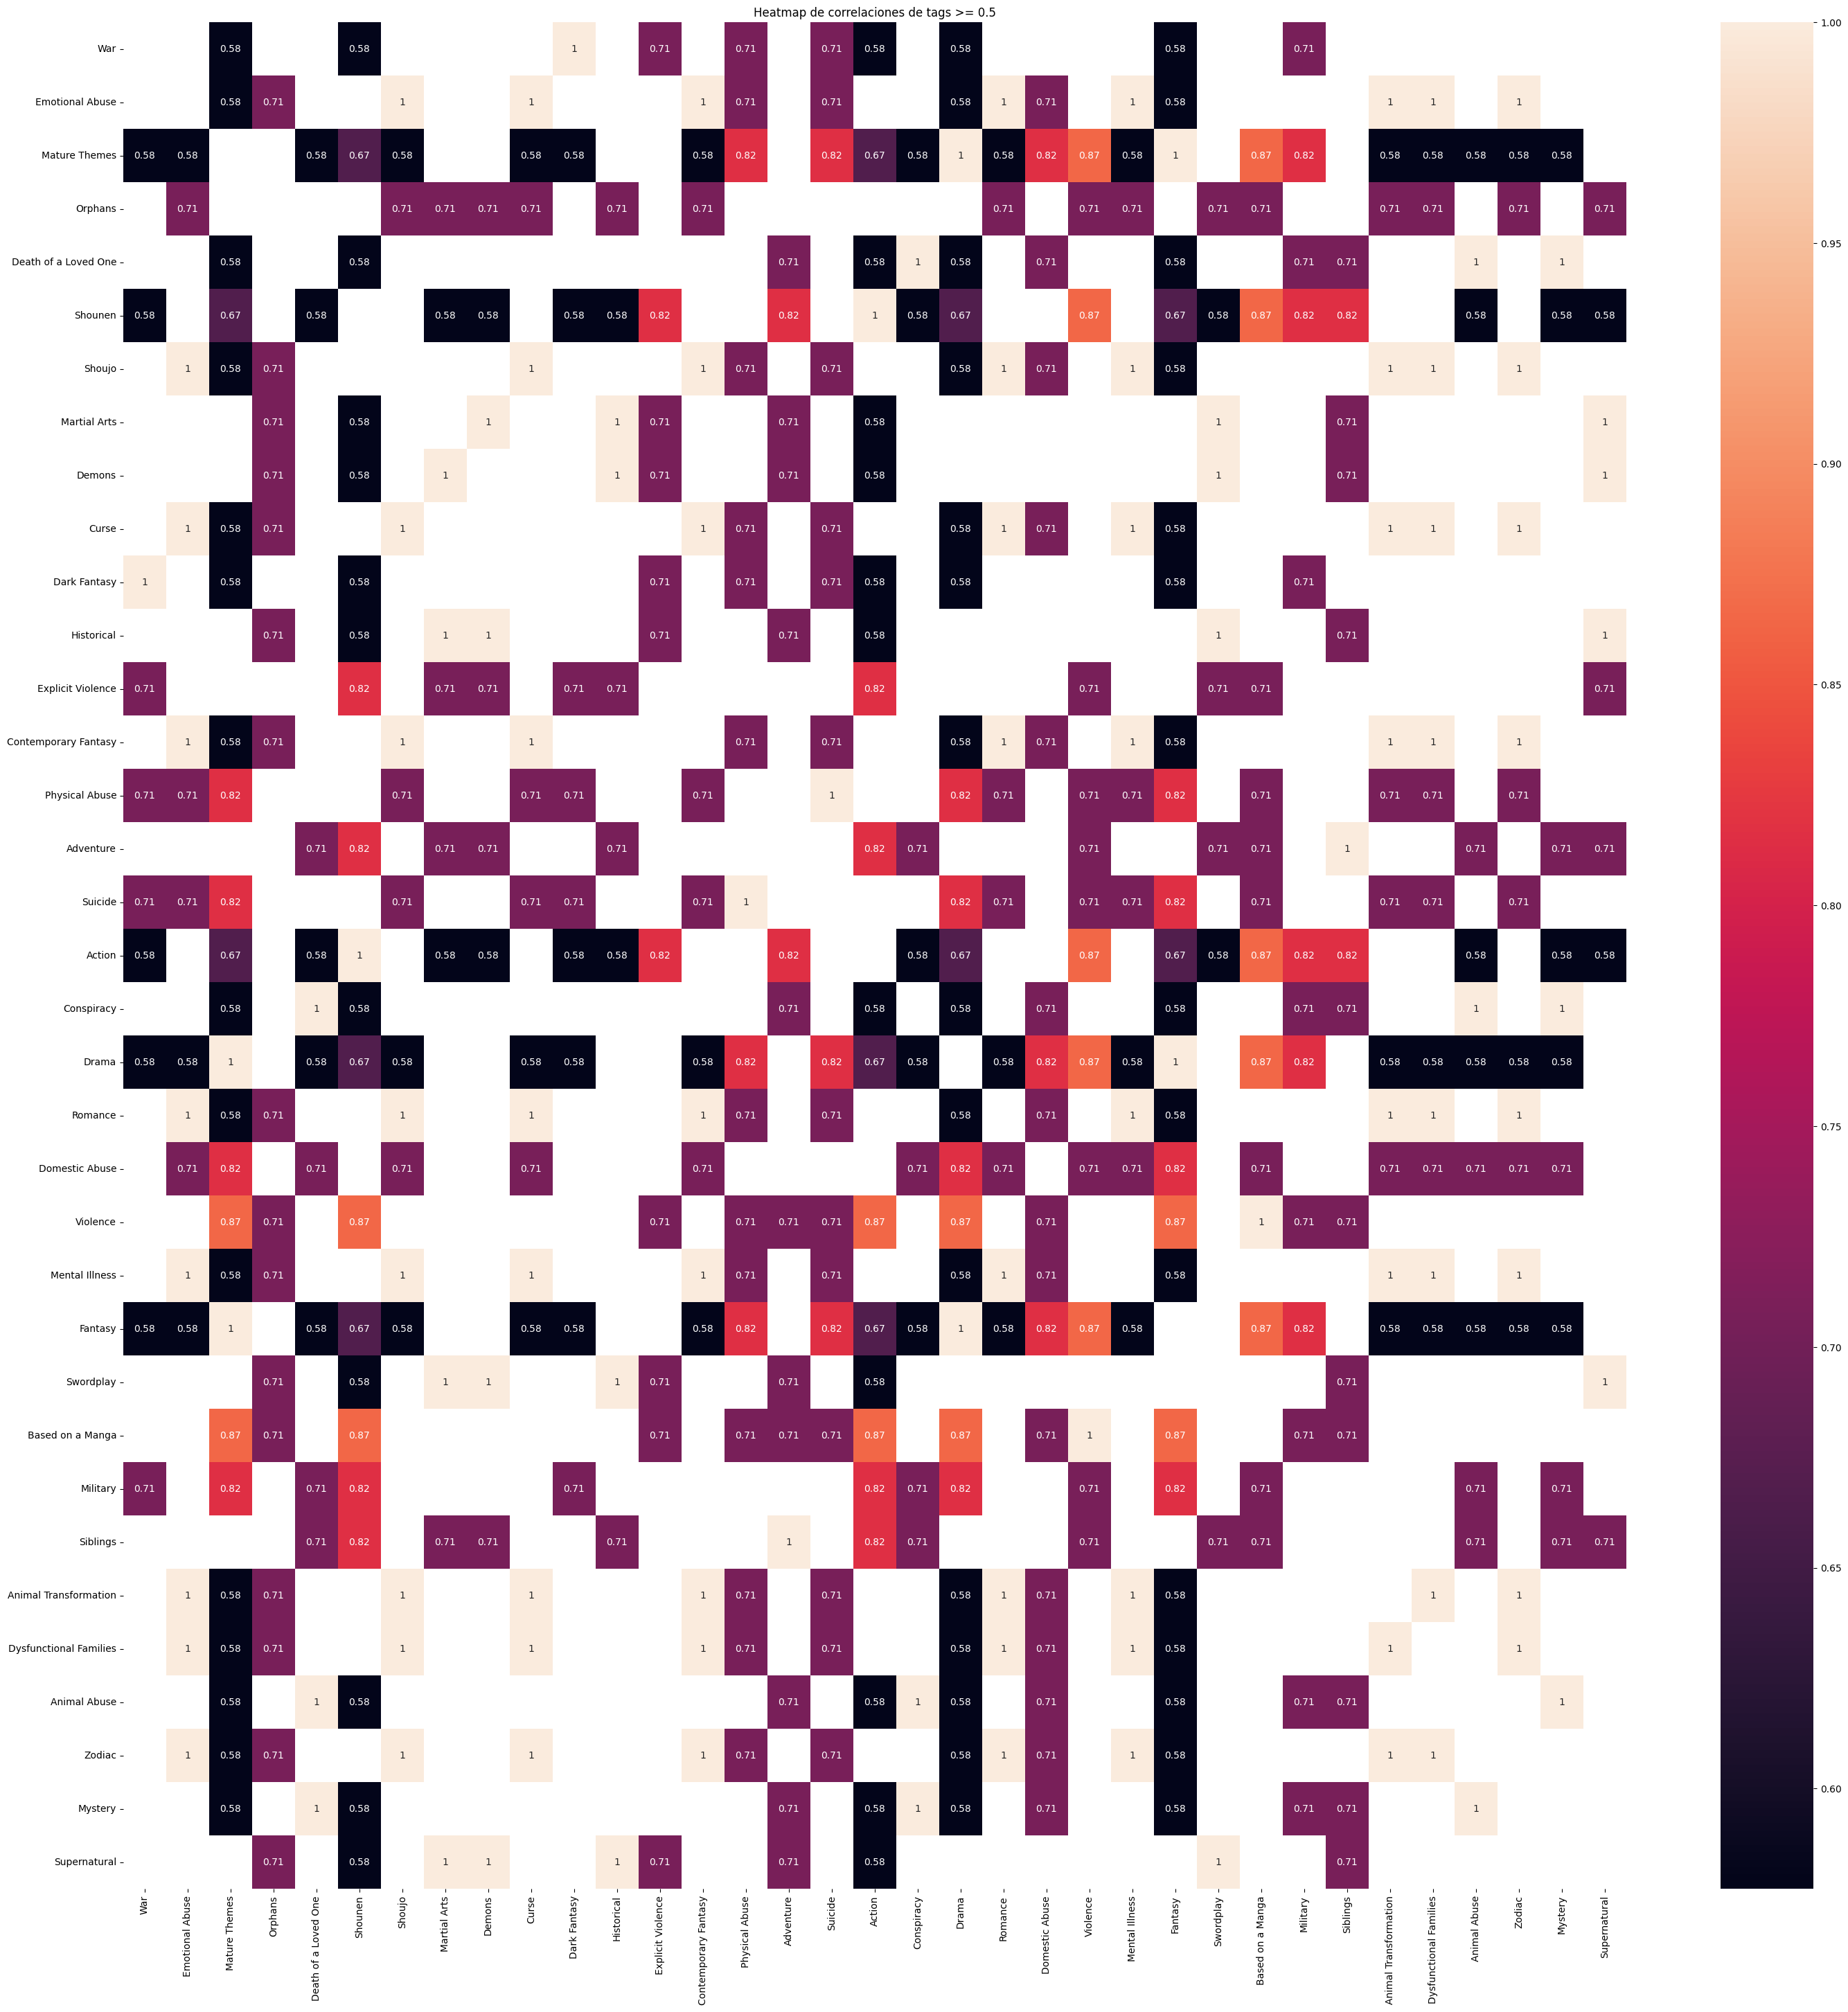

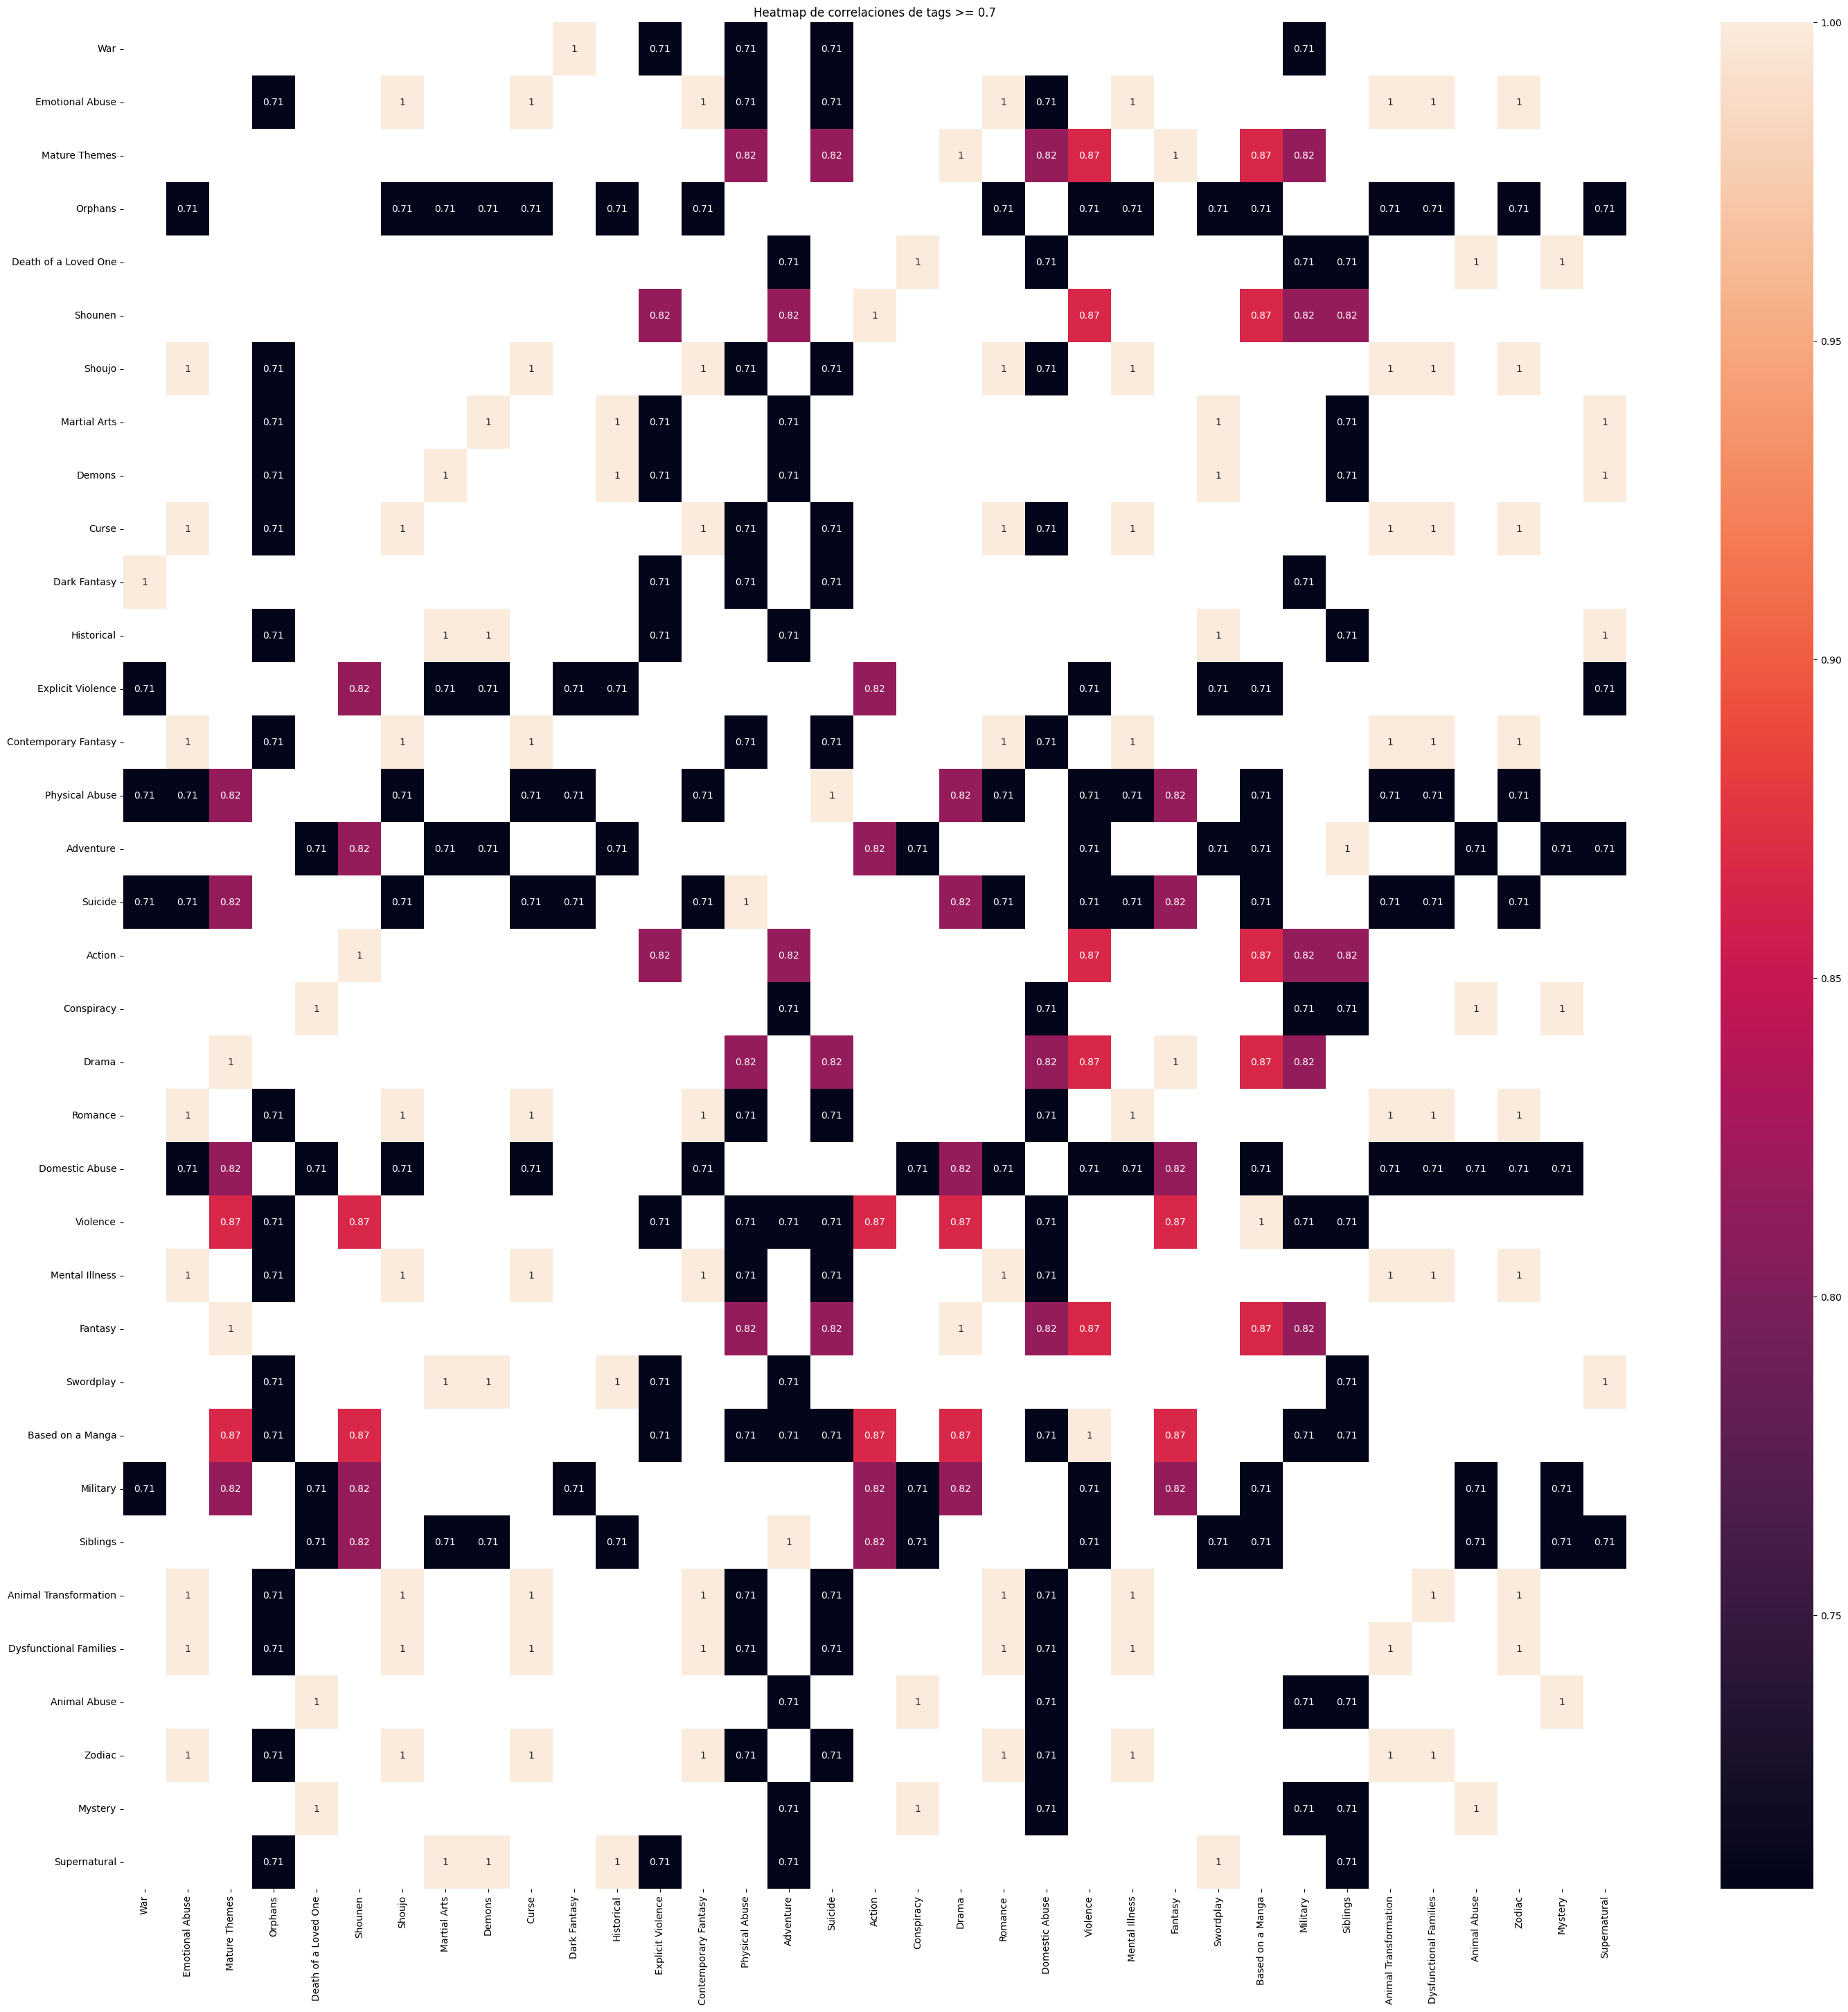

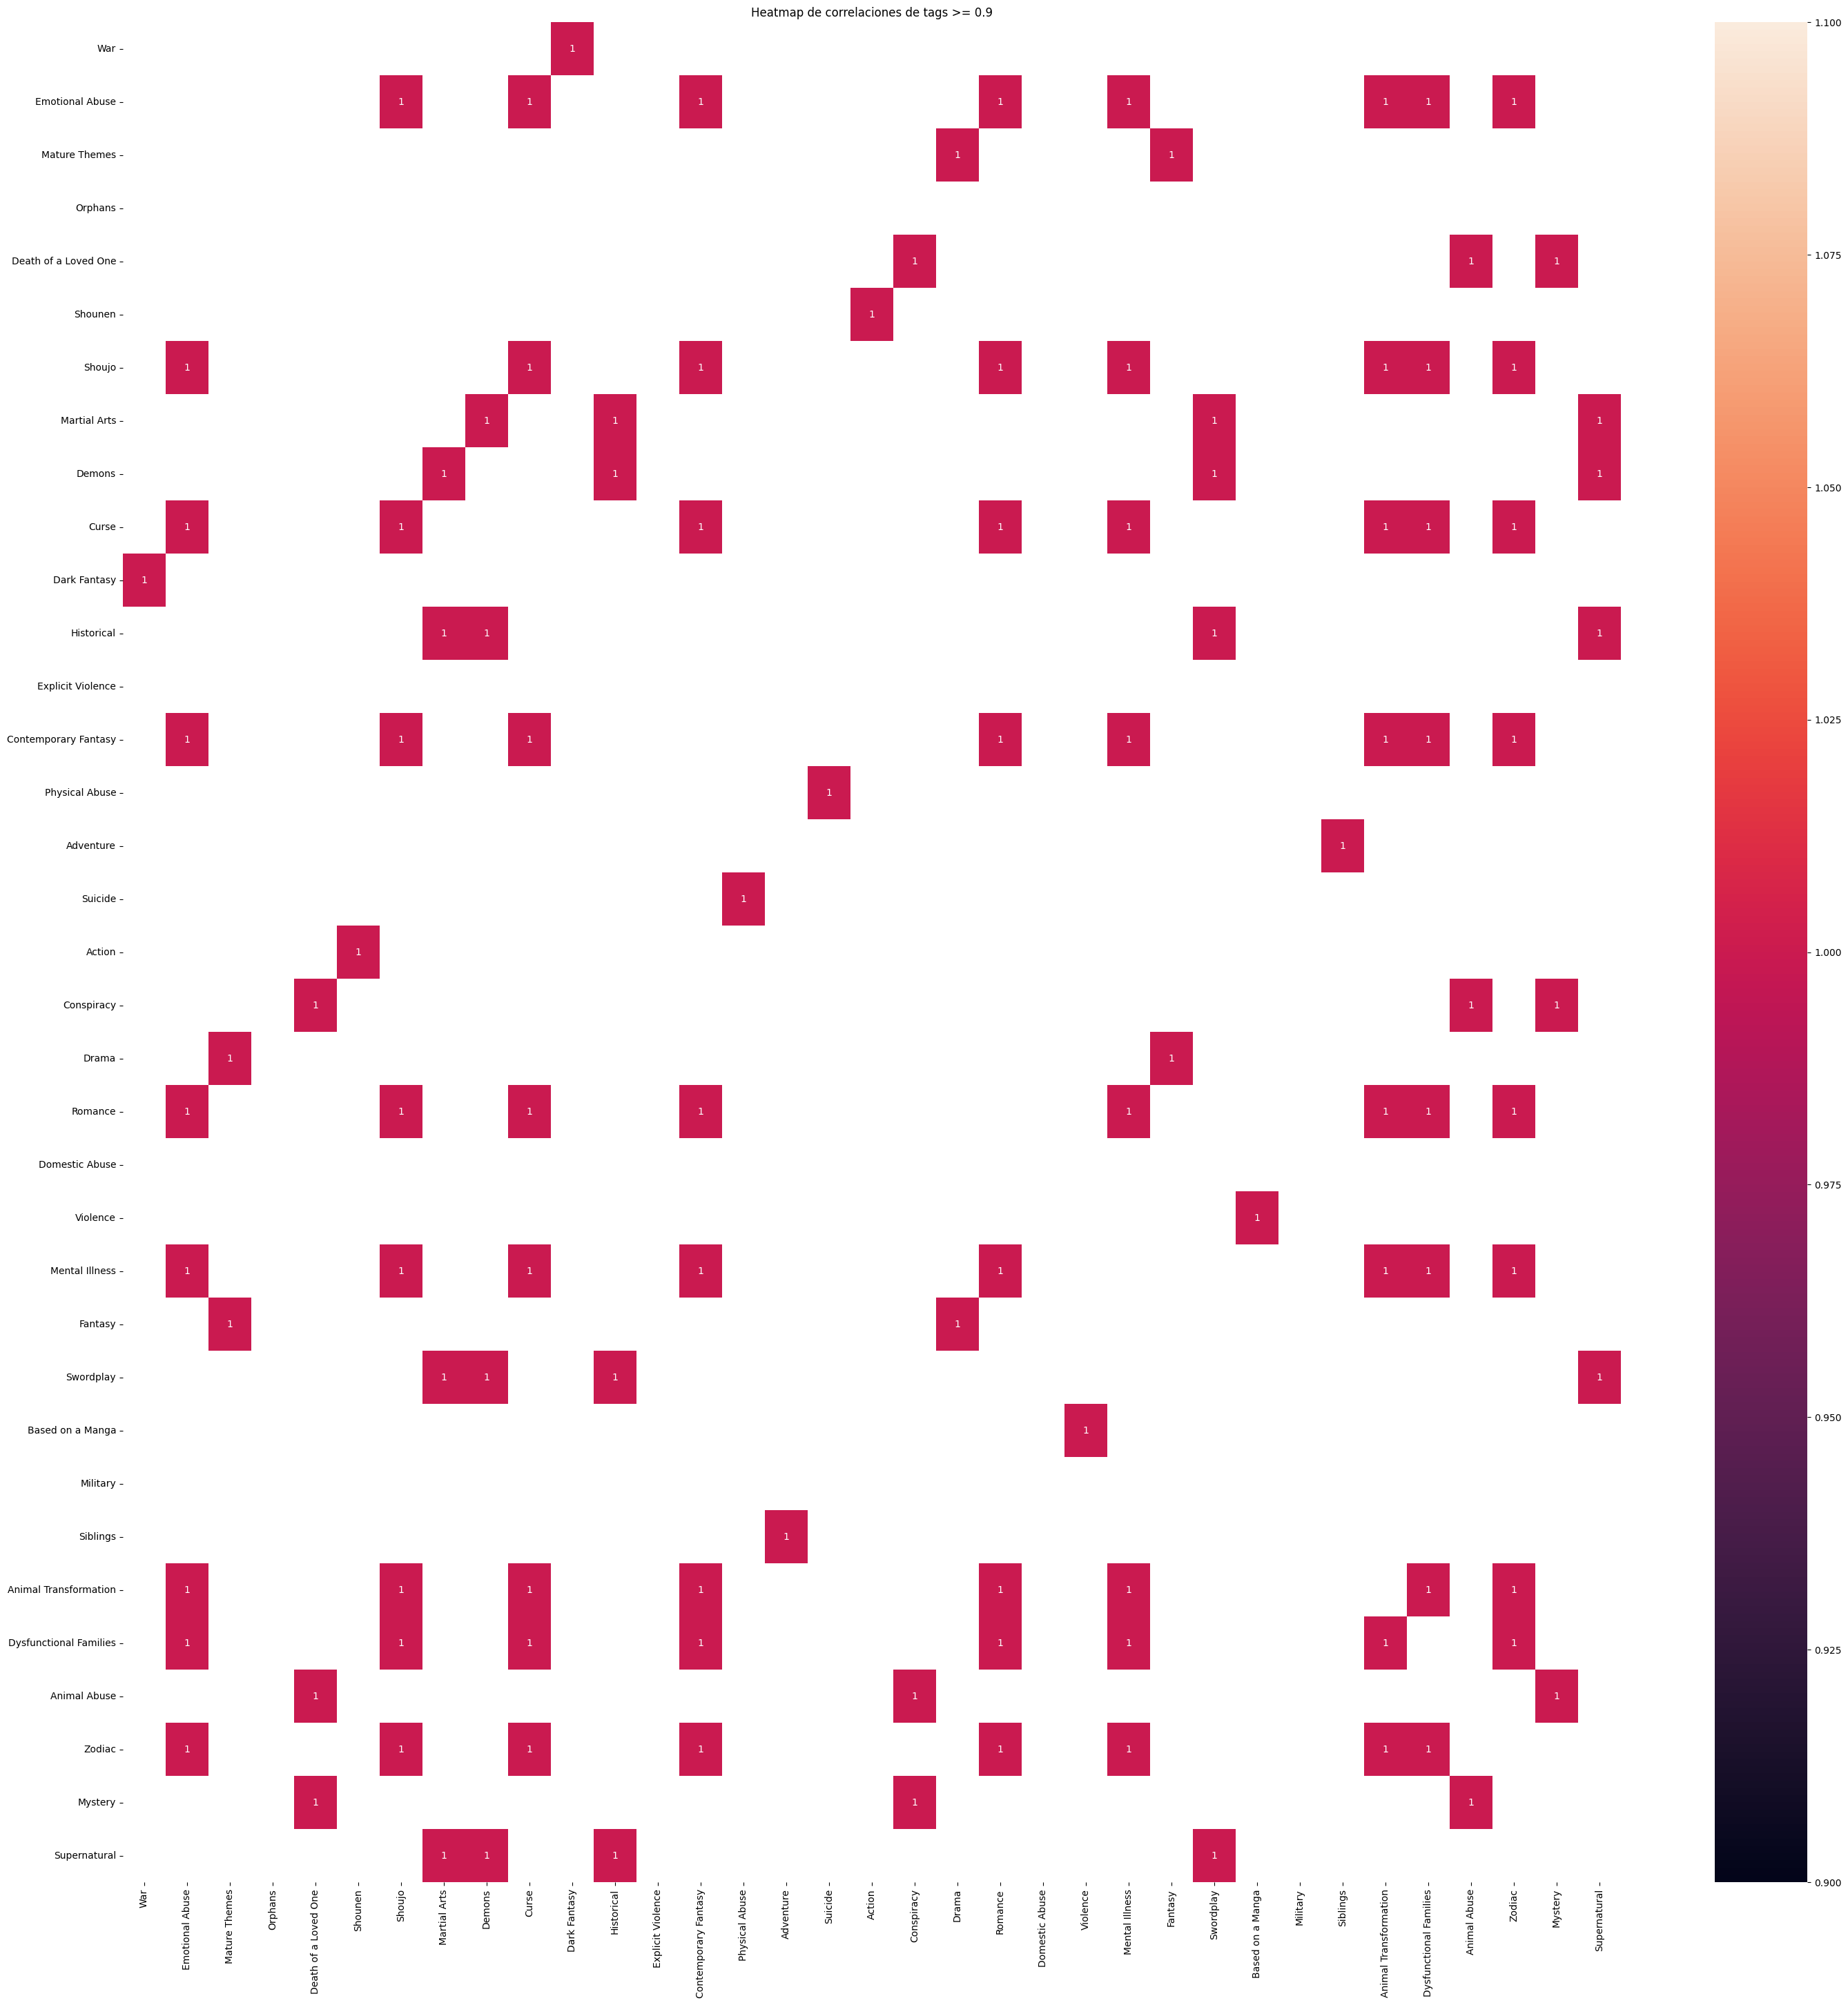

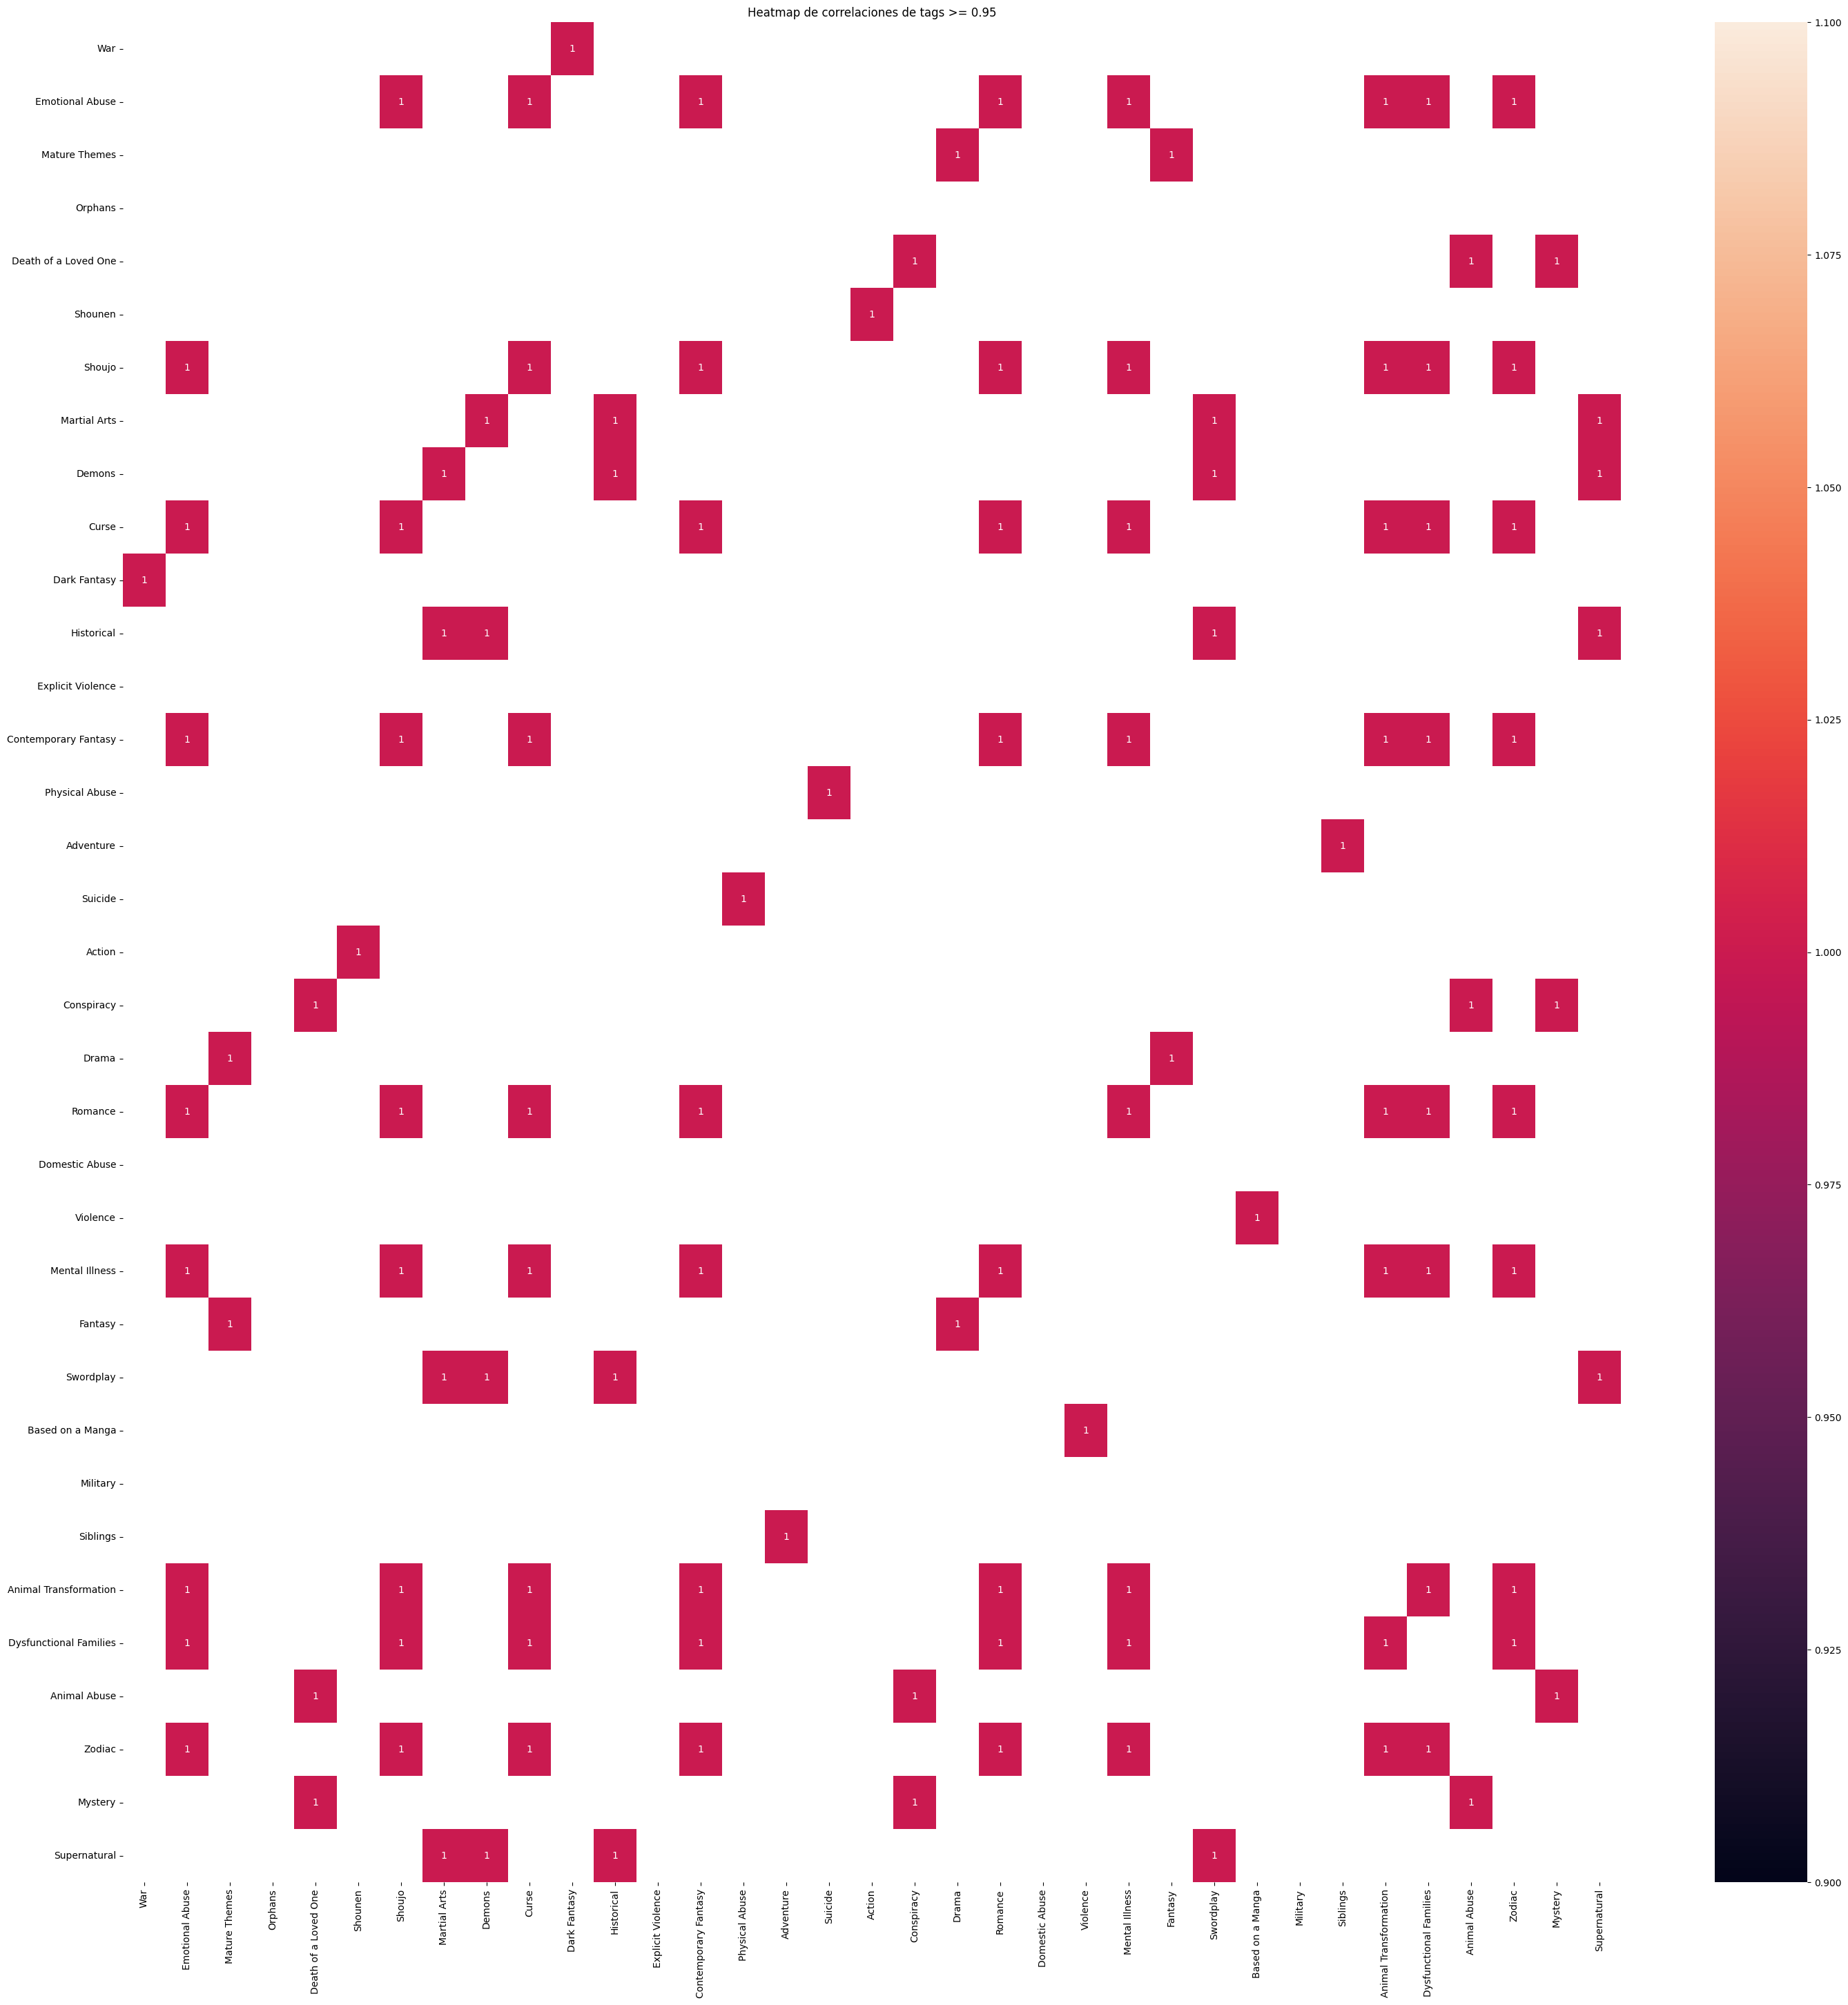

In [156]:
# Correlacción de forma gráfica.

# El plan es el siguiente: Dado que hay muchas columnas, solo se considerarán las correlacciones
# que sea >= 0.5. En otro gráfico, para ampliar, correlacciones >=0.7. En otro, >=0.9. Y por
# último, en otro gráfico, >=0.95.

# Para ello, se hará un bucle que itere sobre los valores de correlacción que se quieren
# considerar. En cada iteración, se hará un subset del DataFrame de correlacciones, considerando
# solamente las correlacciones que sean >= al valor de correlacción que se está considerando en la
# iteración actual. Luego, se hará un heatmap con el subset. Sin embargo, no considerar la diagonal
# donde la correlacción es 1, ya que no tiene sentido considerar la correlacción de un tag consigo
# mismo. Además, se hará un subplot para cada iteración, para que se vea mejor.

# Se considerarán los siguientes valores de correlacción: 0.5, 0.7, 0.9, 0.95

for corr_value in [0.5, 0.7, 0.9, 0.95]:
    # Obtener el subset de correlaciones que sean >= al valor de correlación que se está considerando
    corr_subset = all_tags_df_sparse.corr()[all_tags_df_sparse.corr() >= corr_value]

    # Eliminar la diagonal estableciéndola a NaN
    np.fill_diagonal(corr_subset.values, np.nan)

    # Obtener el número de filas y columnas del subset
    rows, cols = corr_subset.shape

    # Crear el subplot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Crear el heatmap
    sns.heatmap(corr_subset, annot=True, ax=ax)

    # Ponerle título al heatmap
    ax.set_title(f"Heatmap de correlaciones de tags >= {corr_value}")

    # Mostrar el heatmap
    plt.show()

In [158]:
# En específico, imprimir las correlaciones >= 0.95, que no sean con el mismo tag (diagonal).

corr_subset = all_tags_df_sparse.corr()[all_tags_df_sparse.corr() >= 0.95]

print("Correlaciones >= 0.95:")
for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}")

Correlaciones >= 0.95:
	Dark Fantasy y War tienen una correlación de 1.0
	Shoujo y Emotional Abuse tienen una correlación de 1.0
	Curse y Emotional Abuse tienen una correlación de 1.0
	Contemporary Fantasy y Emotional Abuse tienen una correlación de 1.0
	Romance y Emotional Abuse tienen una correlación de 1.0
	Mental Illness y Emotional Abuse tienen una correlación de 1.0
	Animal Transformation y Emotional Abuse tienen una correlación de 1.0
	Dysfunctional Families y Emotional Abuse tienen una correlación de 1.0
	Zodiac y Emotional Abuse tienen una correlación de 1.0
	Drama y Mature Themes tienen una correlación de 1.0
	Fantasy y Mature Themes tienen una correlación de 1.0
	Conspiracy y Death of a Loved One tienen una correlación de 1.0
	Animal Abuse y Death of a Loved One tienen una correlación de 1.0
	Mystery y Death of a Loved One tienen una correlación de 1.0
	Action y Shounen tienen una correlación de 1.0
	Emotional Abuse y Shoujo tienen una correlación de 1.0
	Curse y Shoujo tien

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


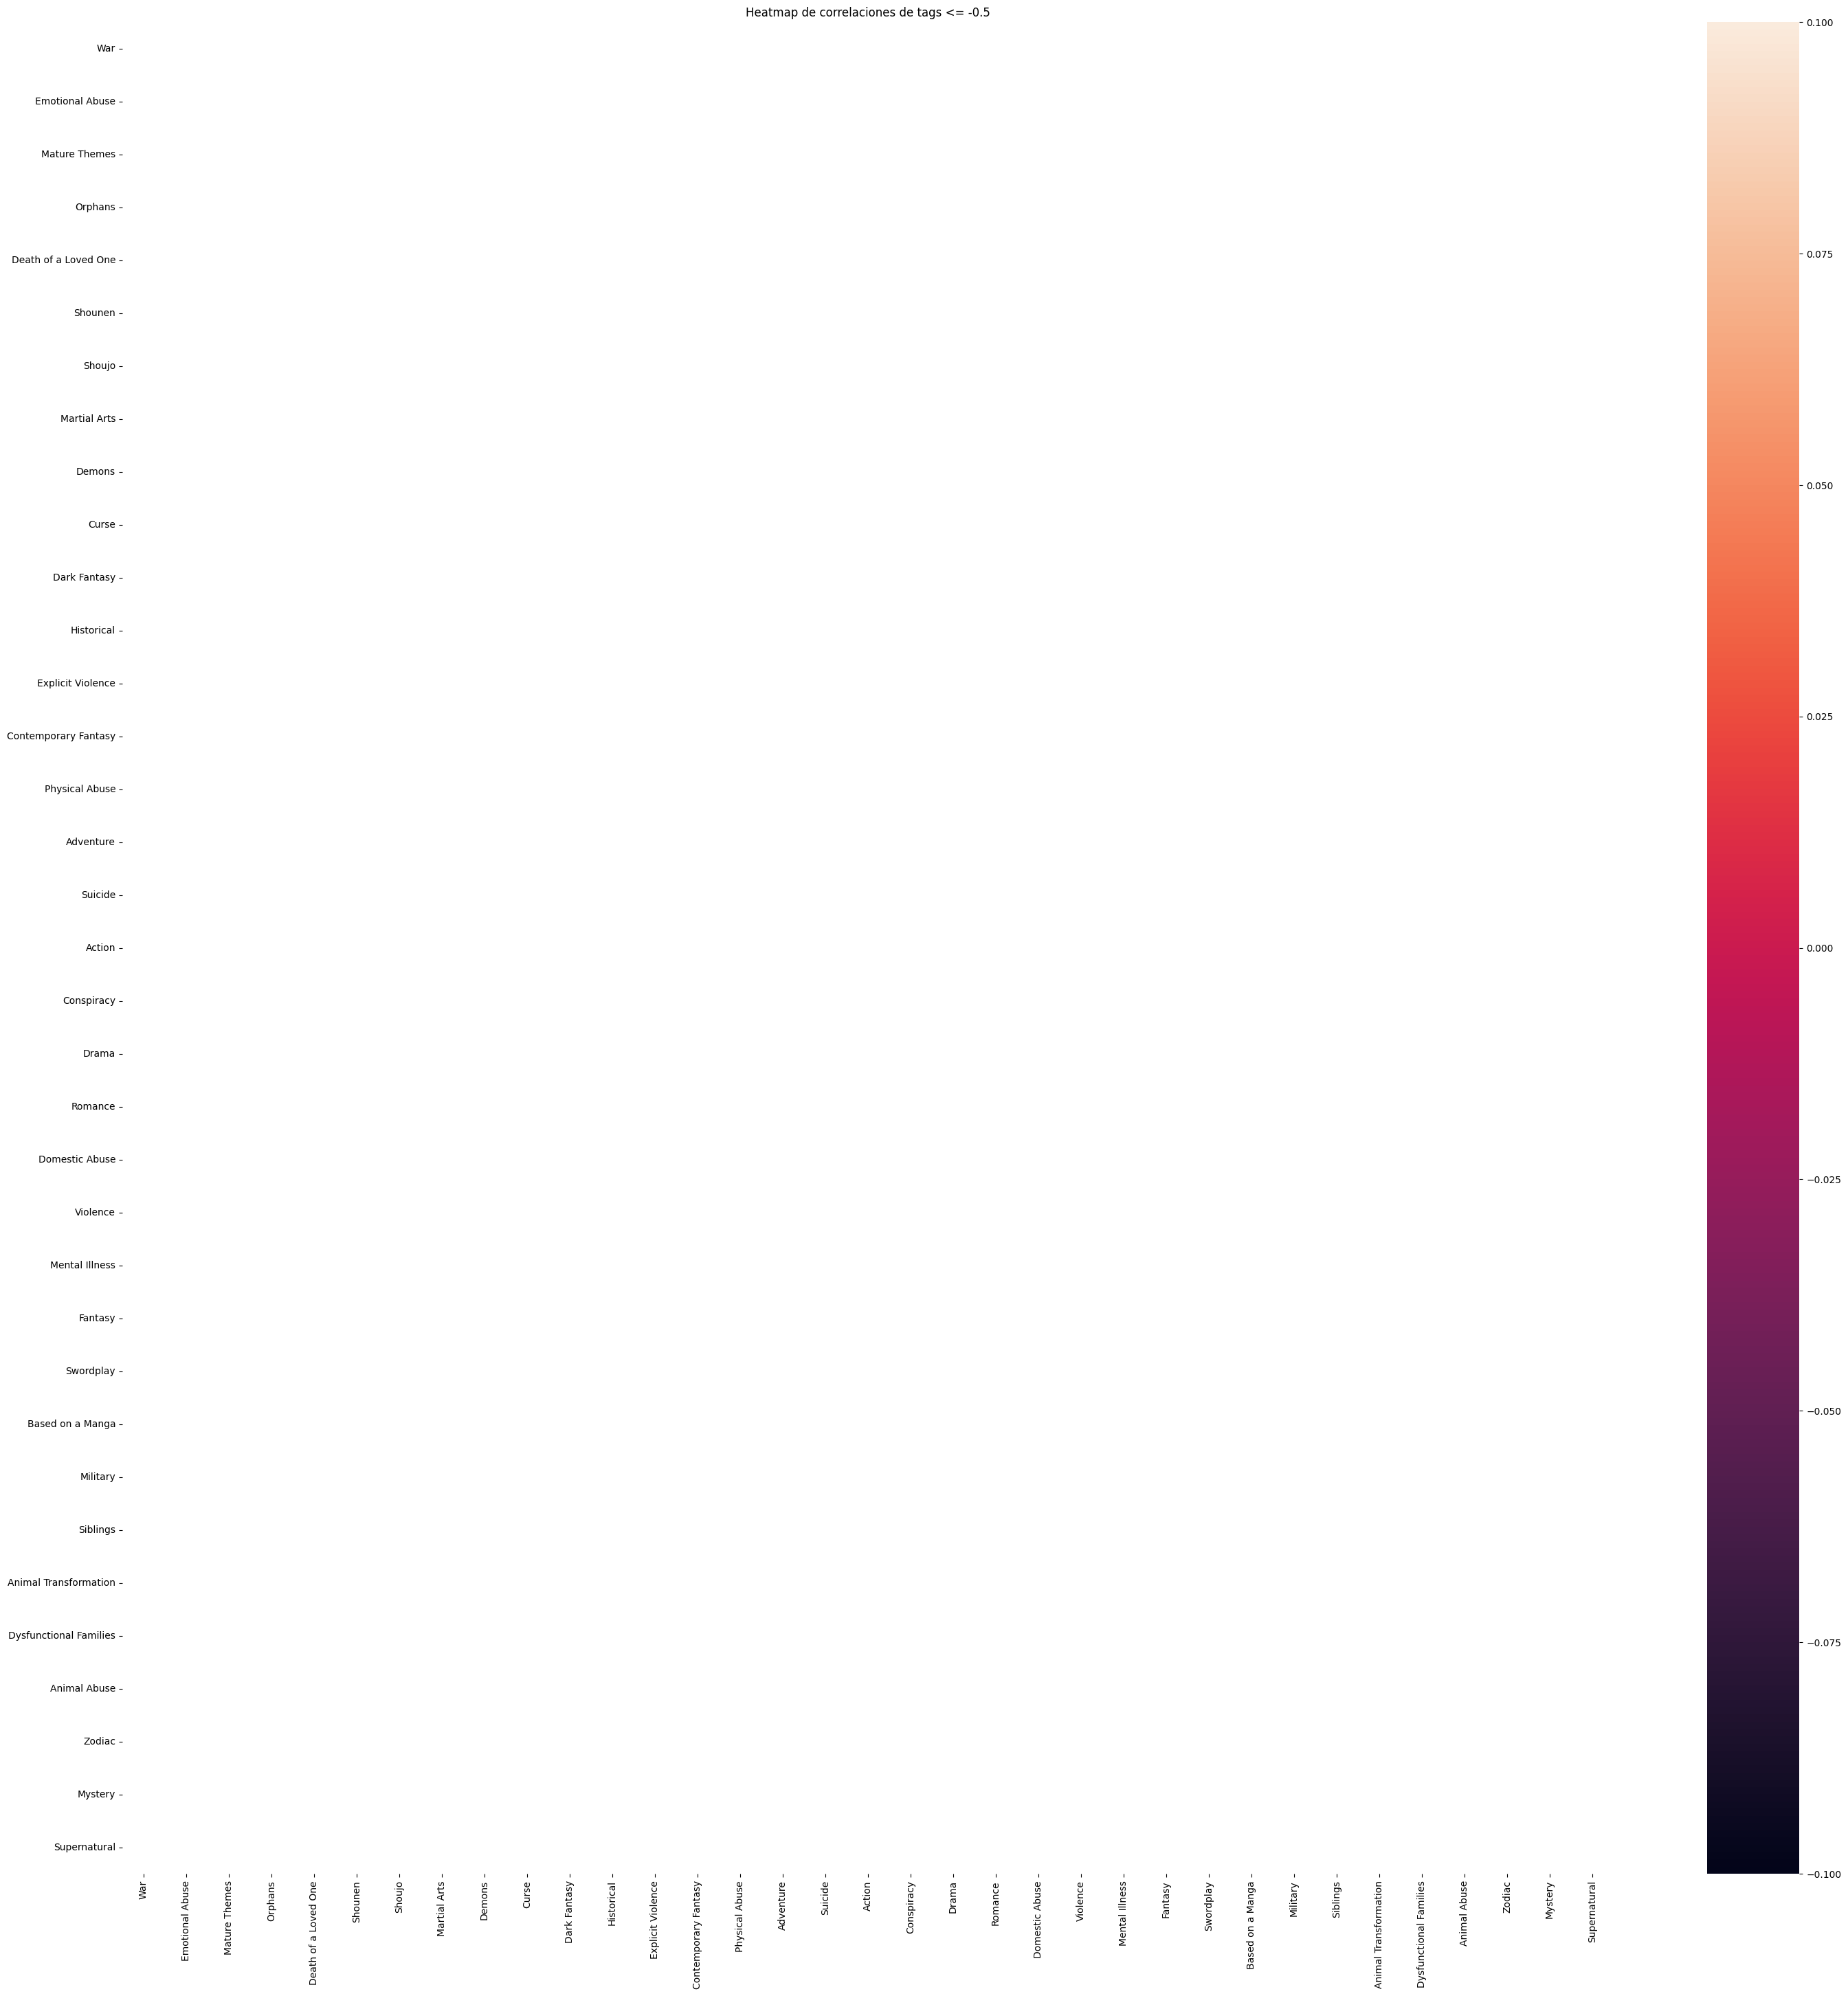

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


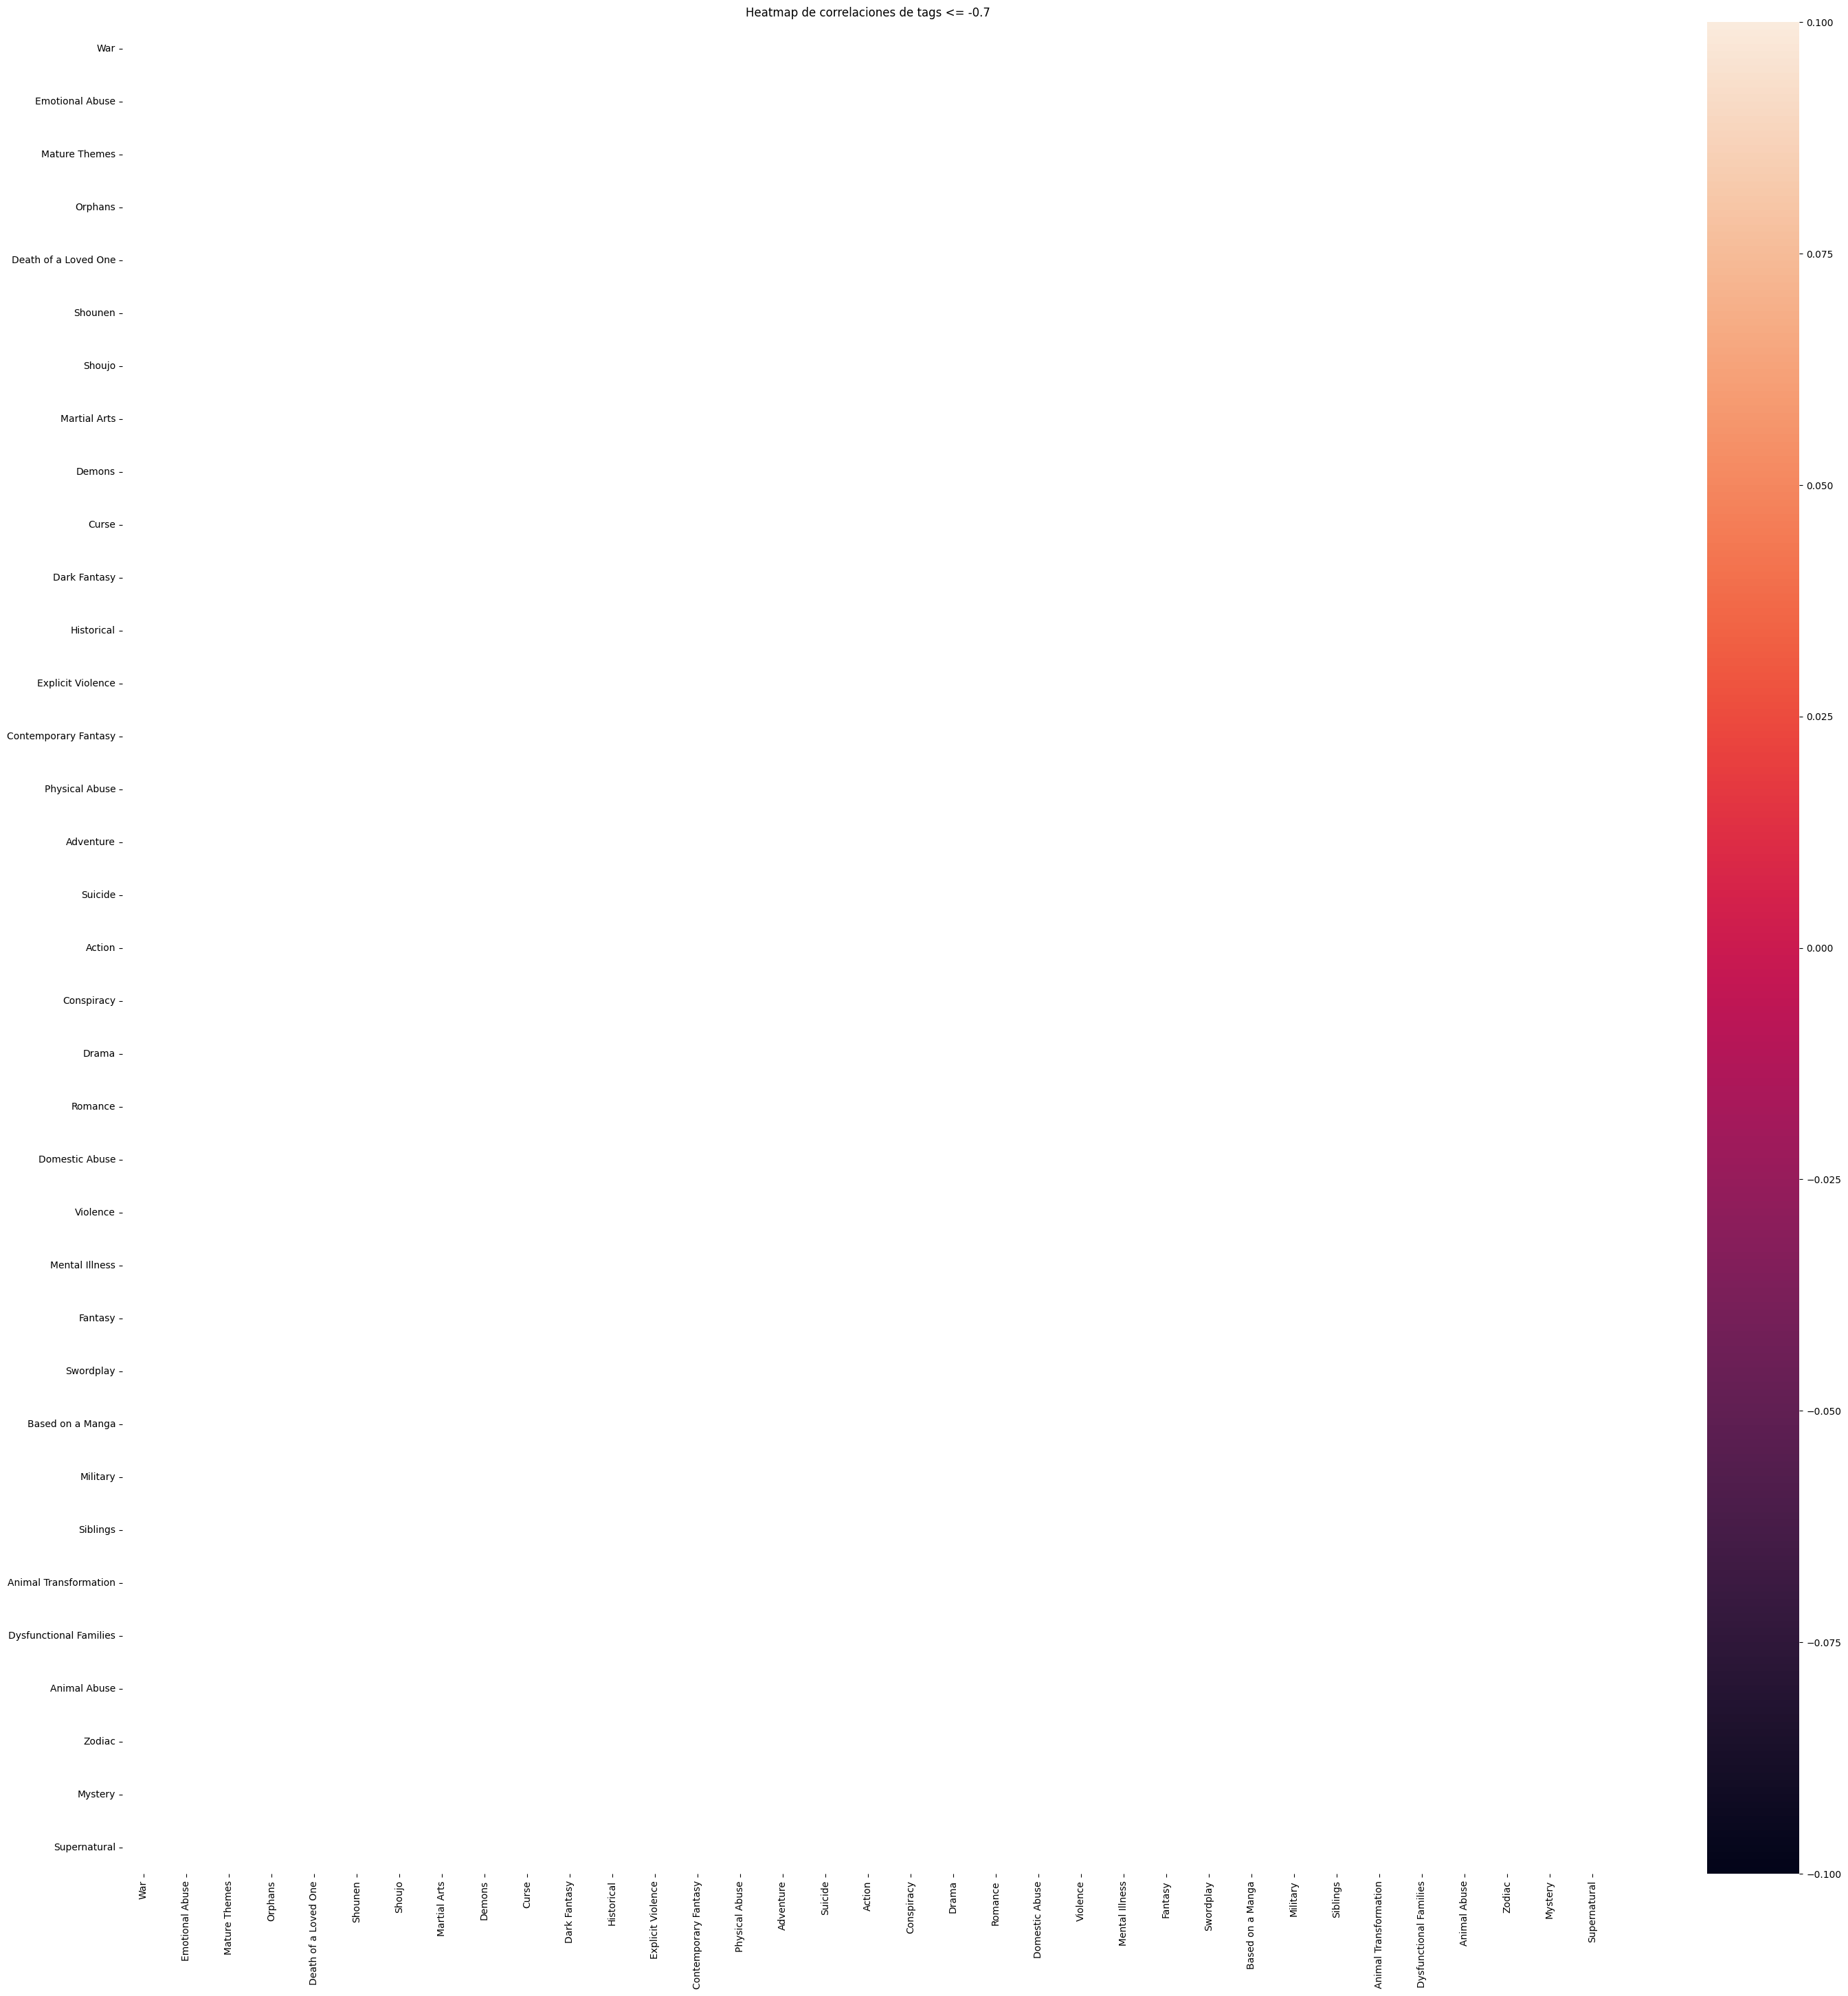

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


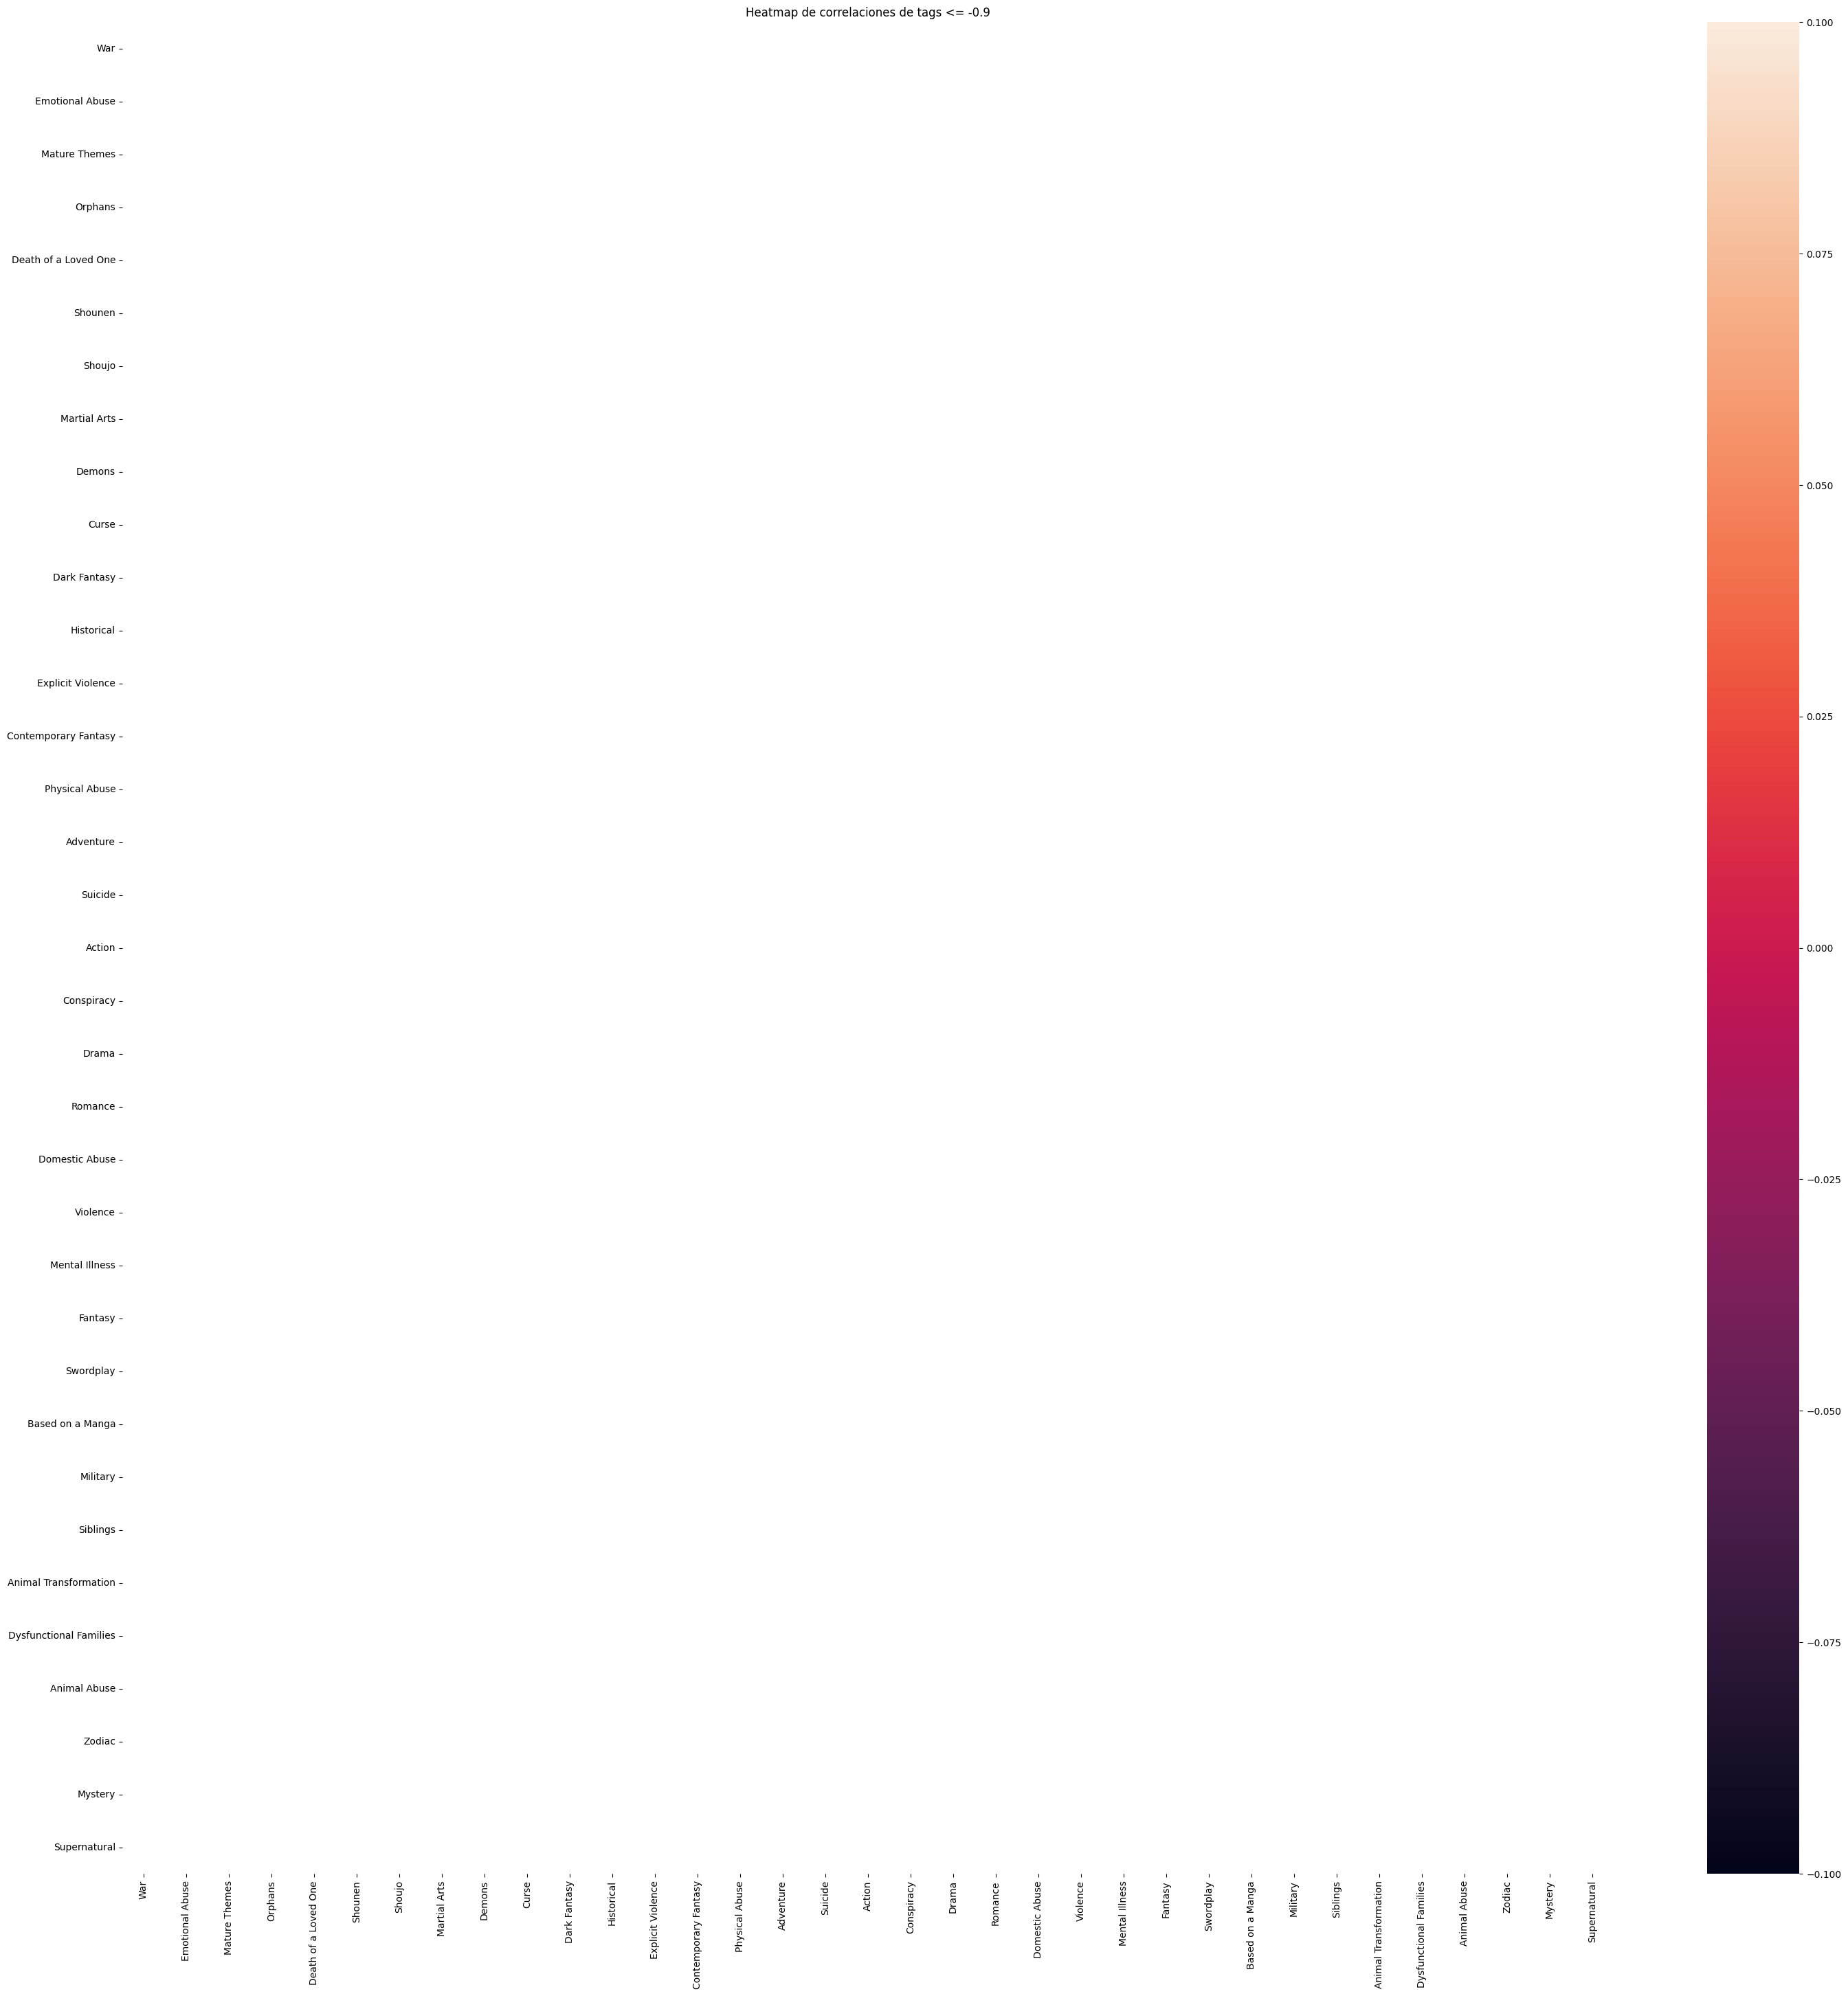

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


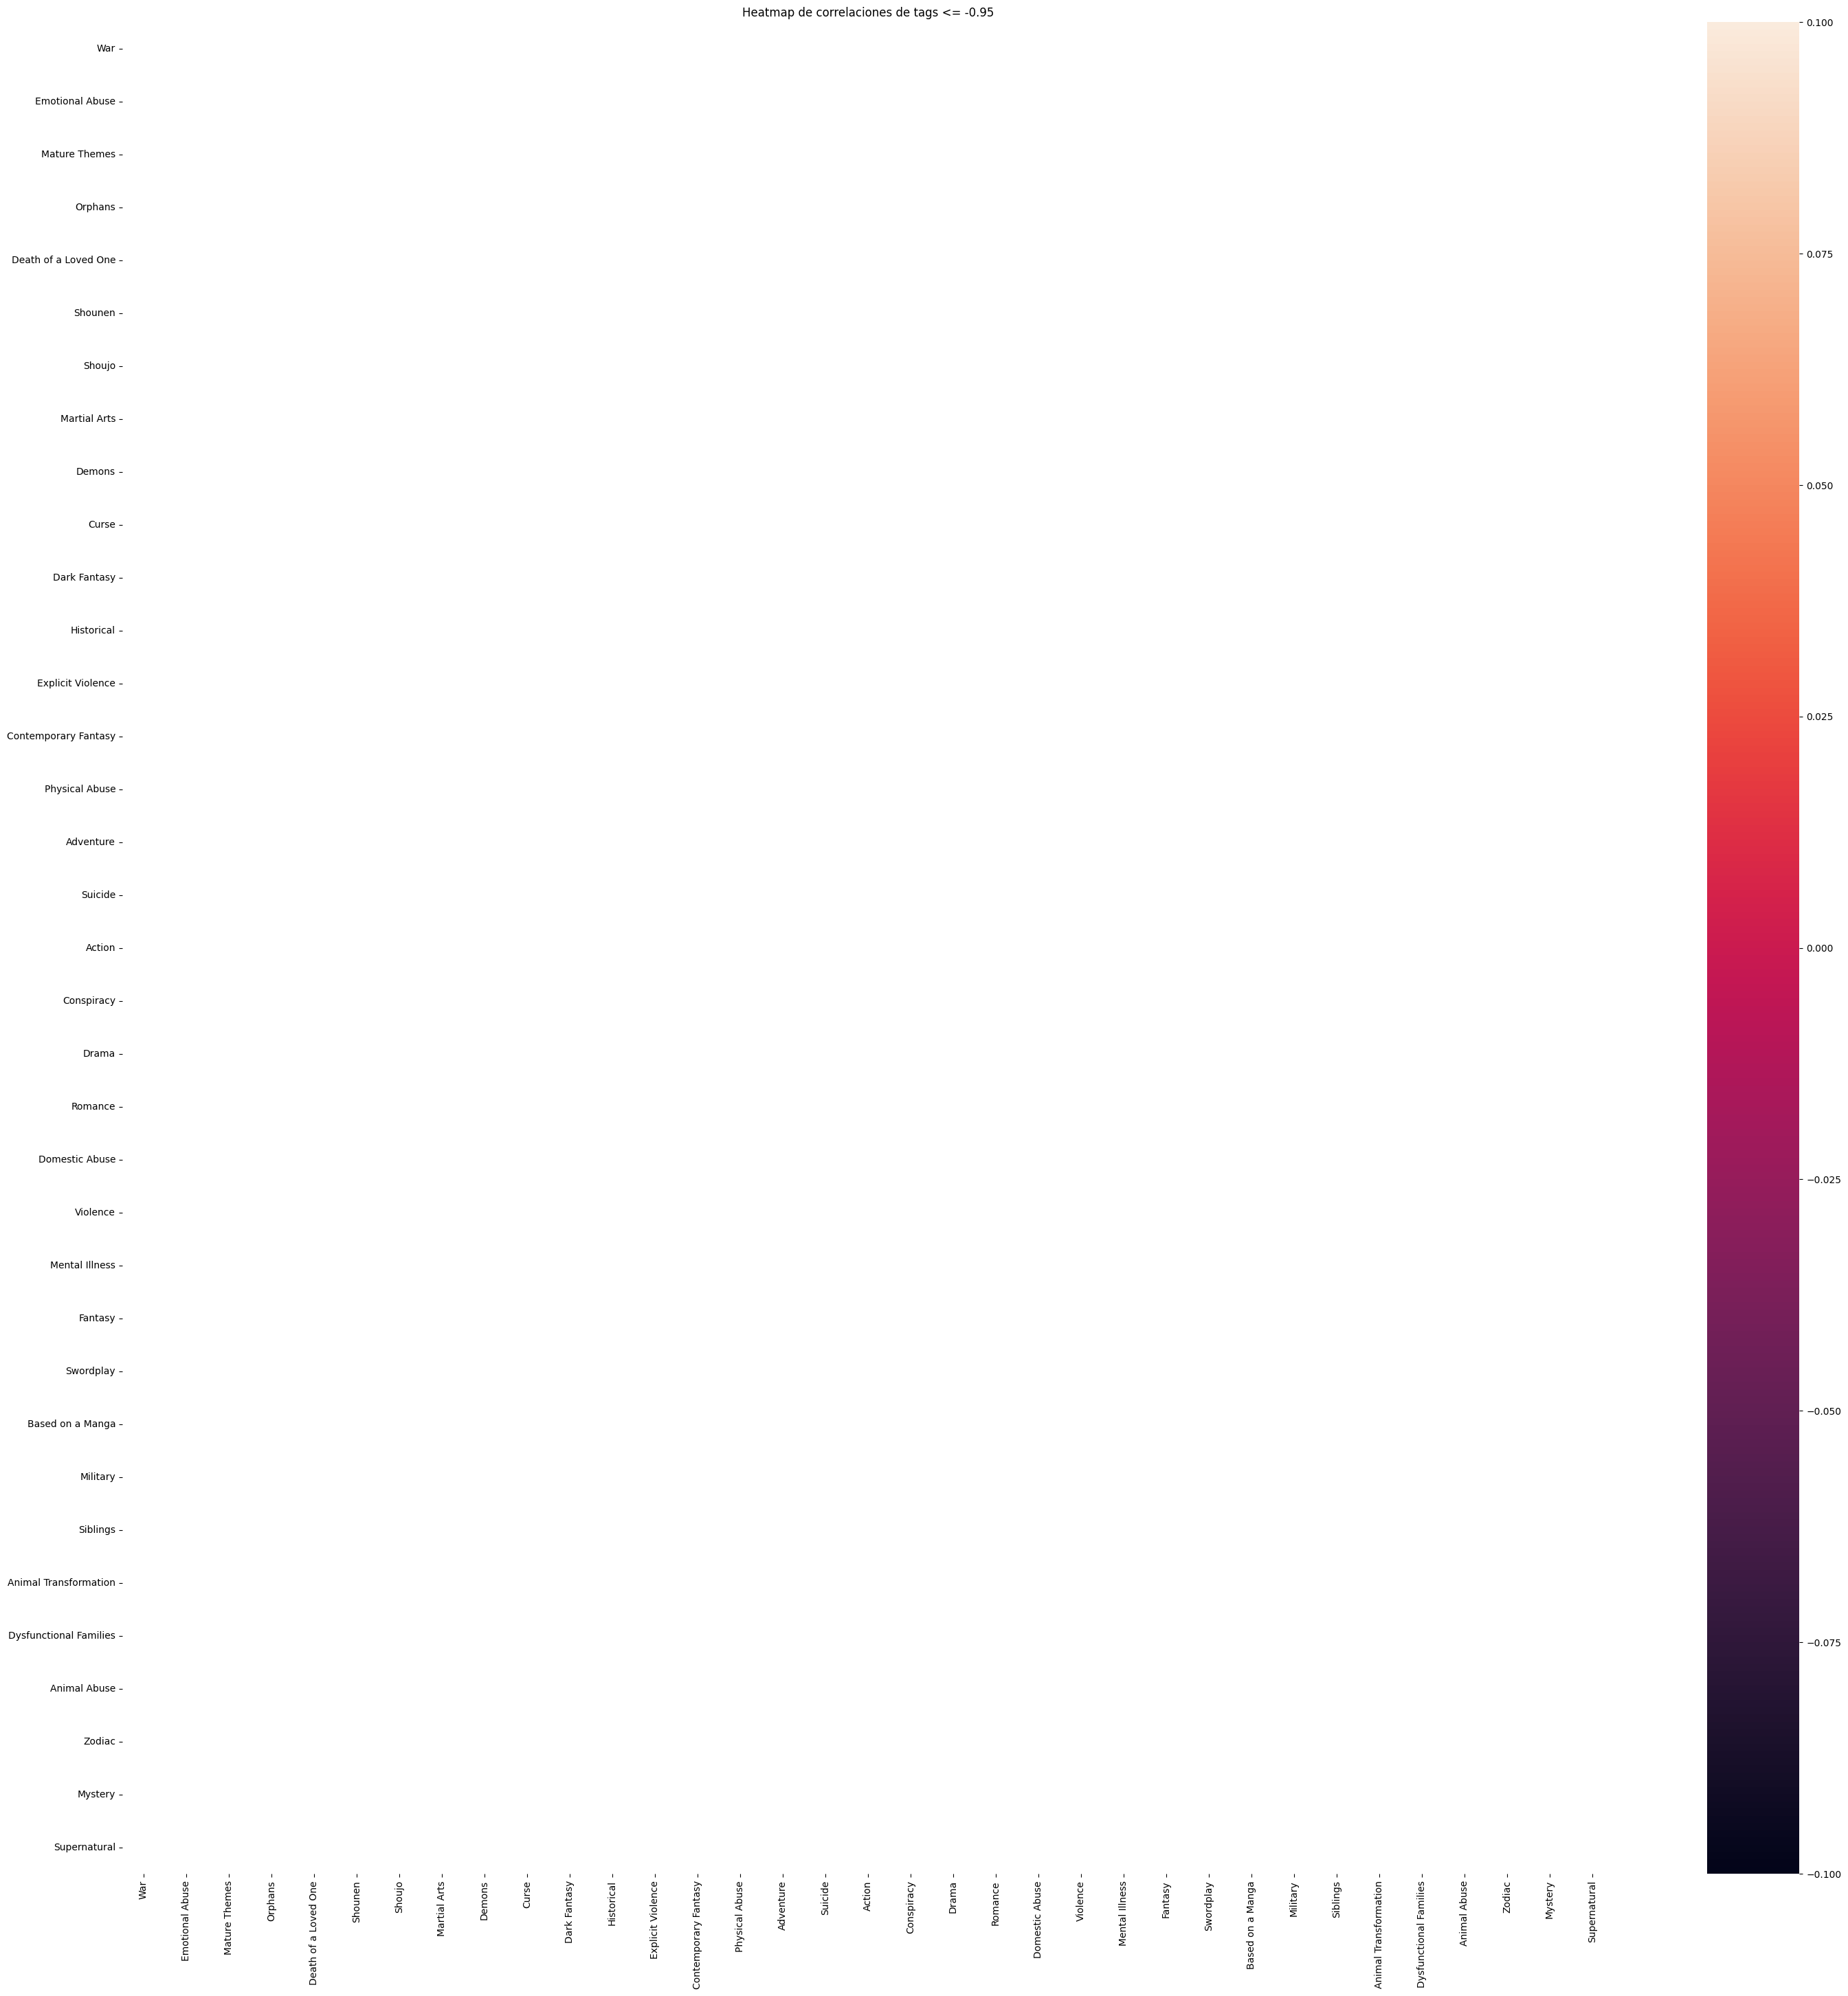

In [159]:
# Ahora, lo mismo de los heatmaps, pero viendo correlacciones negativas. De la misma forma, pero
# usando valores de correlacción negativos.

for corr_value in [-0.5, -0.7, -0.9, -0.95]:
    # Obtener el subset de correlaciones que sean >= al valor de correlación que se está considerando
    corr_subset = all_tags_df_sparse.corr()[all_tags_df_sparse.corr() <= corr_value]

    # Eliminar la diagonal estableciéndola a NaN
    np.fill_diagonal(corr_subset.values, np.nan)

    # Obtener el número de filas y columnas del subset
    rows, cols = corr_subset.shape

    # Crear el subplot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Crear el heatmap
    sns.heatmap(corr_subset, annot=True, ax=ax)

    # Ponerle título al heatmap
    ax.set_title(f"Heatmap de correlaciones de tags <= {corr_value}")

    # Mostrar el heatmap
    plt.show()

In [160]:
# En específico, imprimir las correlaciones <= -0.95, que no sean con el mismo tag (diagonal).

corr_subset = all_tags_df_sparse.corr()[all_tags_df_sparse.corr() <= -0.95]

print("Correlaciones <= -0.95:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}")

Correlaciones <= -0.95:


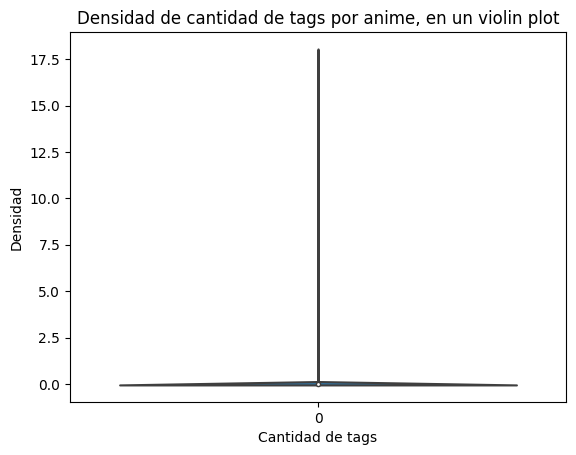

In [161]:
# Violin plot de la cantidad de tags por anime

sns.violinplot(data=all_tags_df_sparse.sum(axis=1))

# Label del eje x
plt.xlabel("Cantidad de tags")

# Label del eje y
plt.ylabel("Densidad")

# Título del gráfico

plt.title("Densidad de cantidad de tags por anime, en un violin plot")

# Mostrar el gráfico

plt.show()

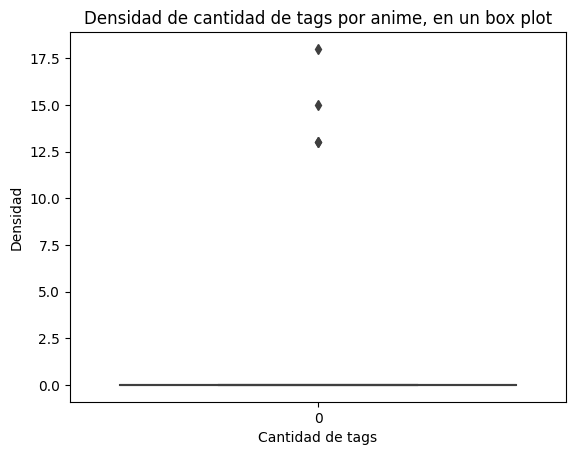

In [162]:
# Box plot de la cantidad de tags por anime

sns.boxplot(data=all_tags_df_sparse.sum(axis=1))

# Label del eje x
plt.xlabel("Cantidad de tags")

# Label del eje y
plt.ylabel("Densidad")


# Título del gráfico

plt.title("Densidad de cantidad de tags por anime, en un box plot")

# Mostrar el gráfico

plt.show()

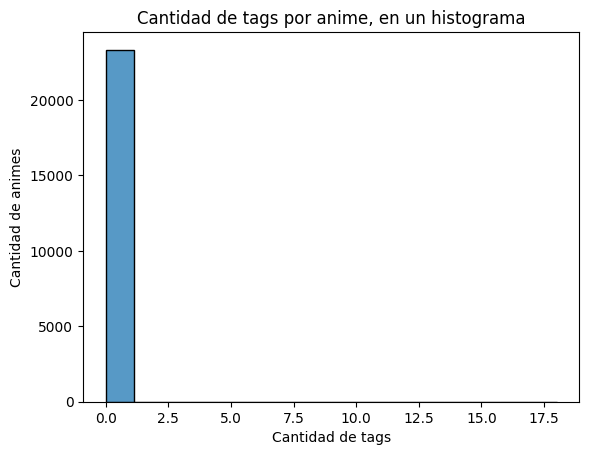

In [164]:
# Histograma que muestra la cantidad de tags por anime

sns.histplot(data=all_tags_df_sparse.sum(axis=1))

# Label del eje x
plt.xlabel("Cantidad de tags")

# Label del eje y

plt.ylabel("Cantidad de animes")

# Título del gráfico

plt.title("Cantidad de tags por anime, en un histograma")

# Mostrar el gráfico

plt.show()

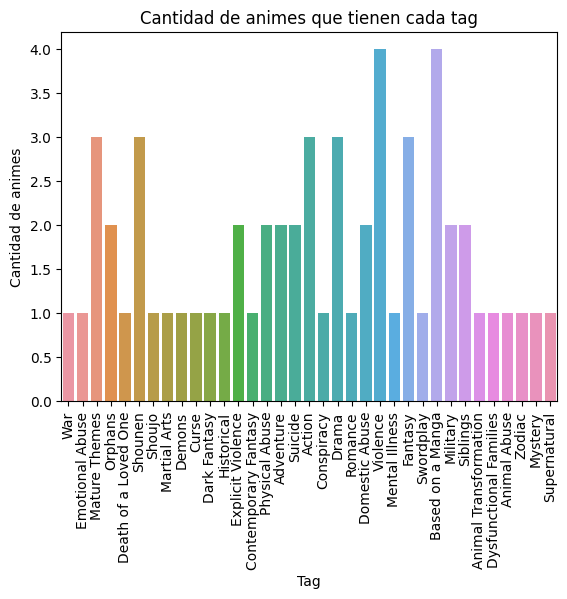

In [165]:
# Distribución en un gráfico de barras de la cantidad de animes que tiene cada tag (es decir, la
# cantidad de animes que tienen el tag X, para cada tag X)

# Obtener la cantidad de animes que tienen cada tag

tags_count = all_tags_df_sparse.sum(axis=0)

# Crear el gráfico de barras

sns.barplot(x=tags_count.index, y=tags_count.values)

# Label del eje x

plt.xlabel("Tag")

# Label del eje y

plt.ylabel("Cantidad de animes")

# Título del gráfico

plt.title("Cantidad de animes que tienen cada tag")

# Rotar los labels del eje x para que se vean mejor

plt.xticks(rotation=90)

# Mostrar el gráfico

plt.show()

Text(0.5, 1.0, 'Medidas de tendencia de la cantidad de tags por anime')

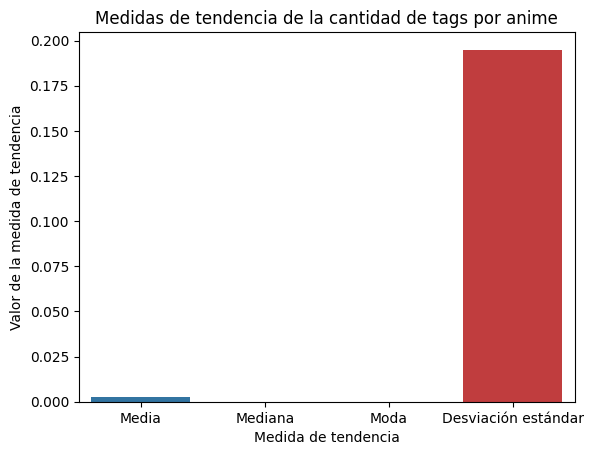

In [166]:
# Distribución en un gráfico de barras sobre distintas medidas de tendencia de la cantidad de tags
# por anime (media, mediana, moda, desviación estándar)

# Obtener la media, mediana, moda y desviación estándar de la cantidad de tags por anime

mean = all_tags_df_sparse.sum(axis=1).mean()
median = all_tags_df_sparse.sum(axis=1).median()
mode = all_tags_df_sparse.sum(axis=1).mode()[0]
std = all_tags_df_sparse.sum(axis=1).std()

# Crear el gráfico de barras

sns.barplot(x=["Media", "Mediana", "Moda", "Desviación estándar"], y=[mean, median, mode, std])

# Label del eje x

plt.xlabel("Medida de tendencia")

# Label del eje y

plt.ylabel("Valor de la medida de tendencia")

# Título del gráfico

plt.title("Medidas de tendencia de la cantidad de tags por anime")

In [167]:
print(f"Se obtuvo una media de {mean}, una mediana de {median}, una moda de {mode} y una desviación estándar de {std}. Si comparamos los valores, tenemos lo siguiente:")

if mean > median:
    print("\tLa media es mayor que la mediana")
elif mean < median:
    print("\tLa media es menor que la mediana")
if mean > mode:
    print("\tLa media es mayor que la moda")
elif mean < mode:
    print("\tLa media es menor que la moda")
if mean > std:
    print("\tLa media es mayor que la desviación estándar")
elif mean < std:
    print("\tLa media es menor que la desviación estándar")
if median > mode:
    print("\tLa mediana es mayor que la moda")
elif median < mode:
    print("\tLa mediana es menor que la moda")
if median > std:
    print("\tLa mediana es mayor que la desviación estándar")
elif median < std:
    print("\tLa mediana es menor que la desviación estándar")
if mode > std:
    print("\tLa moda es mayor que la desviación estándar")
elif mode < std:
    print("\tLa moda es menor que la desviación estándar")
    

Se obtuvo una media de 0.0025287159266243787, una mediana de 0.0, una moda de 0 y una desviación estándar de 0.19496587610329957. Si comparamos los valores, tenemos lo siguiente:
	La media es mayor que la mediana
	La media es mayor que la moda
	La media es menor que la desviación estándar
	La mediana es menor que la desviación estándar
	La moda es menor que la desviación estándar
